## Сначала приведем все в понятный для пандаса вид, импортируем все нужное

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# стили
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set_theme(context='talk', style='whitegrid', palette='deep')
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 25
plt.rcParams['figure.titlesize'] = 28
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['savefig.format'] = 'pdf'
plt.rcParams['figure.autolayout'] = 'true'
plt.rcParams['figure.frameon'] = 'false'
plt.rcParams['axes.spines.left'] = 'false'
plt.rcParams['axes.spines.right'] = 'false'
plt.rcParams['axes.spines.top'] = 'false'
plt.rcParams['legend.fancybox'] = 'false'
plt.rcParams['axes.spines.bottom'] = 'false'

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
# для графиков, где надо много цветов
# sns.set_palette(sns.color_palette('deep'))
# а по дефолту 
sns.set_palette(sns.color_palette("Blues", n_colors=5)[1:])
pd.set_option('display.max_columns', 60)

In [4]:
from dotenv import load_dotenv
import os
load_dotenv()
path = os.getenv("DATA_PATH")
folder = os.getenv("DATA_FOLDER_PATH")

cols = {'new_id': 'new_id',
 'Месяц': 'month',
 'Дата открытия, категориальный': 'open_date',
 'Торговая площадь, категориальный': 'area',
 'Населенный пункт': 'locality',
 'Регион': 'region',
 'Трафик': 'traffic',
 'Средний чек': 'avg_check',
 'Численность населения': 'population',
 'Количество домохозяйств': 'households',
 'Трафик пеший, в час': 'ped_traffic',
 'Трафик авто, в час': 'auto_traffic',
 'Маркетплейсы, доставки, постаматы (100 м)': 'marketplaces',
 'Медицинские уч. и аптеки (300 м)': 'medical',
 'Школы (300 м)': 'schools',
 'Остановки (300 м)': 'stops',
 'Продуктовые магазины (500 м)': 'shops',
 'Пятерочки (500 м)': 'pyaterochki_near'}
visual_cols =  [cols[name] for name in [
    'Трафик',
    'Средний чек',
    'Численность населения',
    'Количество домохозяйств',
    'Трафик пеший, в час',
    'Трафик авто, в час',
    'Маркетплейсы, доставки, постаматы (100 м)',
    'Медицинские уч. и аптеки (300 м)',
    'Школы (300 м)',
    'Остановки (300 м)',
    'Продуктовые магазины (500 м)',
    'Пятерочки (500 м)'
]]

In [18]:
df = pd.read_csv(path, sep=';', low_memory=False)
df.head()

,new_id,Месяц,Трафик,Средний чек,"Дата открытия, категориальный","Торговая площадь, категориальный",Населенный пункт,Регион,Численность населения,Количество домохозяйств,"Трафик пеший, в час","Трафик авто, в час","Маркетплейсы, доставки, постаматы (100 м)",Медицинские уч. и аптеки (300 м),Школы (300 м),Остановки (300 м),Продуктовые магазины (500 м),Пятерочки (500 м)
0,0,10,59662,"823,0603898",Средний по возрасту,Средний,Кавказская ст-ца,Краснодарский край,10177,608,"76,9","200,333333",0,6,0,0,2,0
1,0,5,56674,"859,3619753",Средний по возрасту,Средний,Кавказская ст-ца,Краснодарский край,10177,608,"76,9","200,333333",0,6,0,0,2,0
2,0,1,51488,"763,9377659",Средний по возрасту,Средний,Кавказская ст-ца,Краснодарский край,10177,608,"76,9","200,333333",0,6,0,0,2,0
3,0,6,56693,"836,3623093",Средний по возрасту,Средний,Кавказская ст-ца,Краснодарский край,10177,608,"76,9","200,333333",0,6,0,0,2,0
4,0,7,58128,"845,2577093",Средний по возрасту,Средний,Кавказская ст-ца,Краснодарский край,10177,608,"76,9","200,333333",0,6,0,0,2,0


In [19]:
# Приводим все целевые поля к числам
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')

# Считаем число пустых значений
display(df[list(df.columns)].isna().sum()) # их 0 кстати


C:\Users\Daria\AppData\Local\Temp\ipykernel_16700\3572225280.py:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')


new_id                                       0
Месяц                                        0
Трафик                                       0
Средний чек                                  0
Дата открытия, категориальный                0
Торговая площадь, категориальный             0
Населенный пункт                             0
Регион                                       0
Численность населения                        0
Количество домохозяйств                      0
Трафик пеший, в час                          0
Трафик авто, в час                           0
Маркетплейсы, доставки, постаматы (100 м)    0
Медицинские уч. и аптеки (300 м)             0
Школы (300 м)                                0
Остановки (300 м)                            0
Продуктовые магазины (500 м)                 0
Пятерочки (500 м)                            0
dtype: int64

In [22]:
df.info() # из-за запятых вместо точек не все распознано как числа

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256723 entries, 0 to 256722
Data columns (total 18 columns):
 #   Column                                     Non-Null Count   Dtype 
---  ------                                     --------------   ----- 
 0   new_id                                     256723 non-null  int64 
 1   Месяц                                      256723 non-null  int64 
 2   Трафик                                     256723 non-null  int64 
 3   Средний чек                                256723 non-null  object
 4   Дата открытия, категориальный              256723 non-null  object
 5   Торговая площадь, категориальный           256723 non-null  object
 6   Населенный пункт                           256723 non-null  object
 7   Регион                                     256723 non-null  object
 8   Численность населения                      256723 non-null  int64 
 9   Количество домохозяйств                    256723 non-null  int64 
 10  Трафик пеший, в час 

In [28]:
cols = {'new_id': 'new_id',
 'Месяц': 'month',
 'Дата открытия, категориальный': 'open_date',
 'Торговая площадь, категориальный': 'area',
 'Населенный пункт': 'locality',
 'Регион': 'region',
 'Трафик': 'traffic',
 'Средний чек': 'avg_check',
 'Численность населения': 'population',
 'Количество домохозяйств': 'households',
 'Трафик пеший, в час': 'ped_traffic',
 'Трафик авто, в час': 'auto_traffic',
 'Маркетплейсы, доставки, постаматы (100 м)': 'marketplaces',
 'Медицинские уч. и аптеки (300 м)': 'medical',
 'Школы (300 м)': 'schools',
 'Остановки (300 м)': 'stops',
 'Продуктовые магазины (500 м)': 'shops',
 'Пятерочки (500 м)': 'pyaterochki_near'}
df.rename(columns=cols, inplace=True)
df

,new_id,month,traffic,avg_check,open_date,area,locality,region,population,households,ped_traffic,auto_traffic,marketplaces,medical,schools,stops,shops,pyaterochki_near
0,0,10,59662,"823,0603898",Средний по возрасту,Средний,Кавказская ст-ца,Краснодарский край,10177,608,"76,9","200,333333",0,6,0,0,2,0
1,0,5,56674,"859,3619753",Средний по возрасту,Средний,Кавказская ст-ца,Краснодарский край,10177,608,"76,9","200,333333",0,6,0,0,2,0
2,0,1,51488,"763,9377659",Средний по возрасту,Средний,Кавказская ст-ца,Краснодарский край,10177,608,"76,9","200,333333",0,6,0,0,2,0
3,0,6,56693,"836,3623093",Средний по возрасту,Средний,Кавказская ст-ца,Краснодарский край,10177,608,"76,9","200,333333",0,6,0,0,2,0
4,0,7,58128,"845,2577093",Средний по возрасту,Средний,Кавказская ст-ца,Краснодарский край,10177,608,"76,9","200,333333",0,6,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256718,21742,10,51676,"1167,101083",Новый,Средний,Октябрьский рп,Волгоградская обл,6071,262,"125,375","243,333333",1,1,0,0,1,0
256719,21742,11,51516,"1252,914118",Новый,Средний,Октябрьский рп,Волгоградская обл,6071,262,"125,375","243,333333",1,1,0,0,1,0
256720,21742,9,49593,"1130,823998",Новый,Средний,Октябрьский рп,Волгоградская обл,6071,262,"125,375","243,333333",1,1,0,0,1,0
256721,21742,12,52115,"1461,929305",Новый,Средний,Октябрьский рп,Волгоградская обл,6071,262,"125,375","243,333333",1,1,0,0,1,0


In [31]:
# реашем проблему , вместо .
df["avg_check"] = df["avg_check"].apply(lambda x: float(str(x).replace(",", ".")))
df["ped_traffic"] = df["ped_traffic"].apply(lambda x: float(str(x).replace(",", ".")))
df["auto_traffic"] = df["auto_traffic"].apply(lambda x: float(str(x).replace(",", ".")))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256723 entries, 0 to 256722
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   new_id            256723 non-null  int64  
 1   month             256723 non-null  int64  
 2   traffic           256723 non-null  int64  
 3   avg_check         256723 non-null  float64
 4   open_date         256723 non-null  object 
 5   area              256723 non-null  object 
 6   locality          256723 non-null  object 
 7   region            256723 non-null  object 
 8   population        256723 non-null  int64  
 9   households        256723 non-null  int64  
 10  ped_traffic       256723 non-null  float64
 11  auto_traffic      256723 non-null  float64
 12  marketplaces      256723 non-null  int64  
 13  medical           256723 non-null  int64  
 14  schools           256723 non-null  int64  
 15  stops             256723 non-null  int64  
 16  shops             25

Теперь все типы такие, какие должны быть, столбики на английском

Можно переходить к анализу и сохранить нормальные данные

In [ ]:
df.to_csv(folder + "\cleaned_data_1.csv", index=False)

In [64]:
duplicats = (
    df[["new_id", "locality", "region", "population", "area"]]
    .groupby(["new_id"])
    .agg(lambda x: x.nunique())
    .reset_index()
    .sort_values(by=["locality"])
)  # проверка на то, что для одного id одни данные на каждый месяц
duplicats.sort_values(by="area")
duplicats["normal"] = (
    duplicats["locality"]
    + duplicats["region"]
    + duplicats["population"]
    + duplicats["area"]
) < 5
duplicats


,new_id,locality,region,population,area,normal
0,0,1,1,1,1,True
14499,14499,1,1,1,1,True
14498,14498,1,1,1,1,True
14497,14497,1,1,1,1,True
14496,14496,1,1,1,1,True
...,...,...,...,...,...,...
7244,7244,1,1,1,1,True
7243,7243,1,1,1,1,True
7242,7242,1,1,1,1,True
7250,7250,1,1,1,1,True


In [65]:
duplicats[duplicats['normal'] != 1]

,new_id,locality,region,population,area,normal
13842,13842,1,1,2,1,False


## Теперь анализ, построим графики распределения для каждого показателя

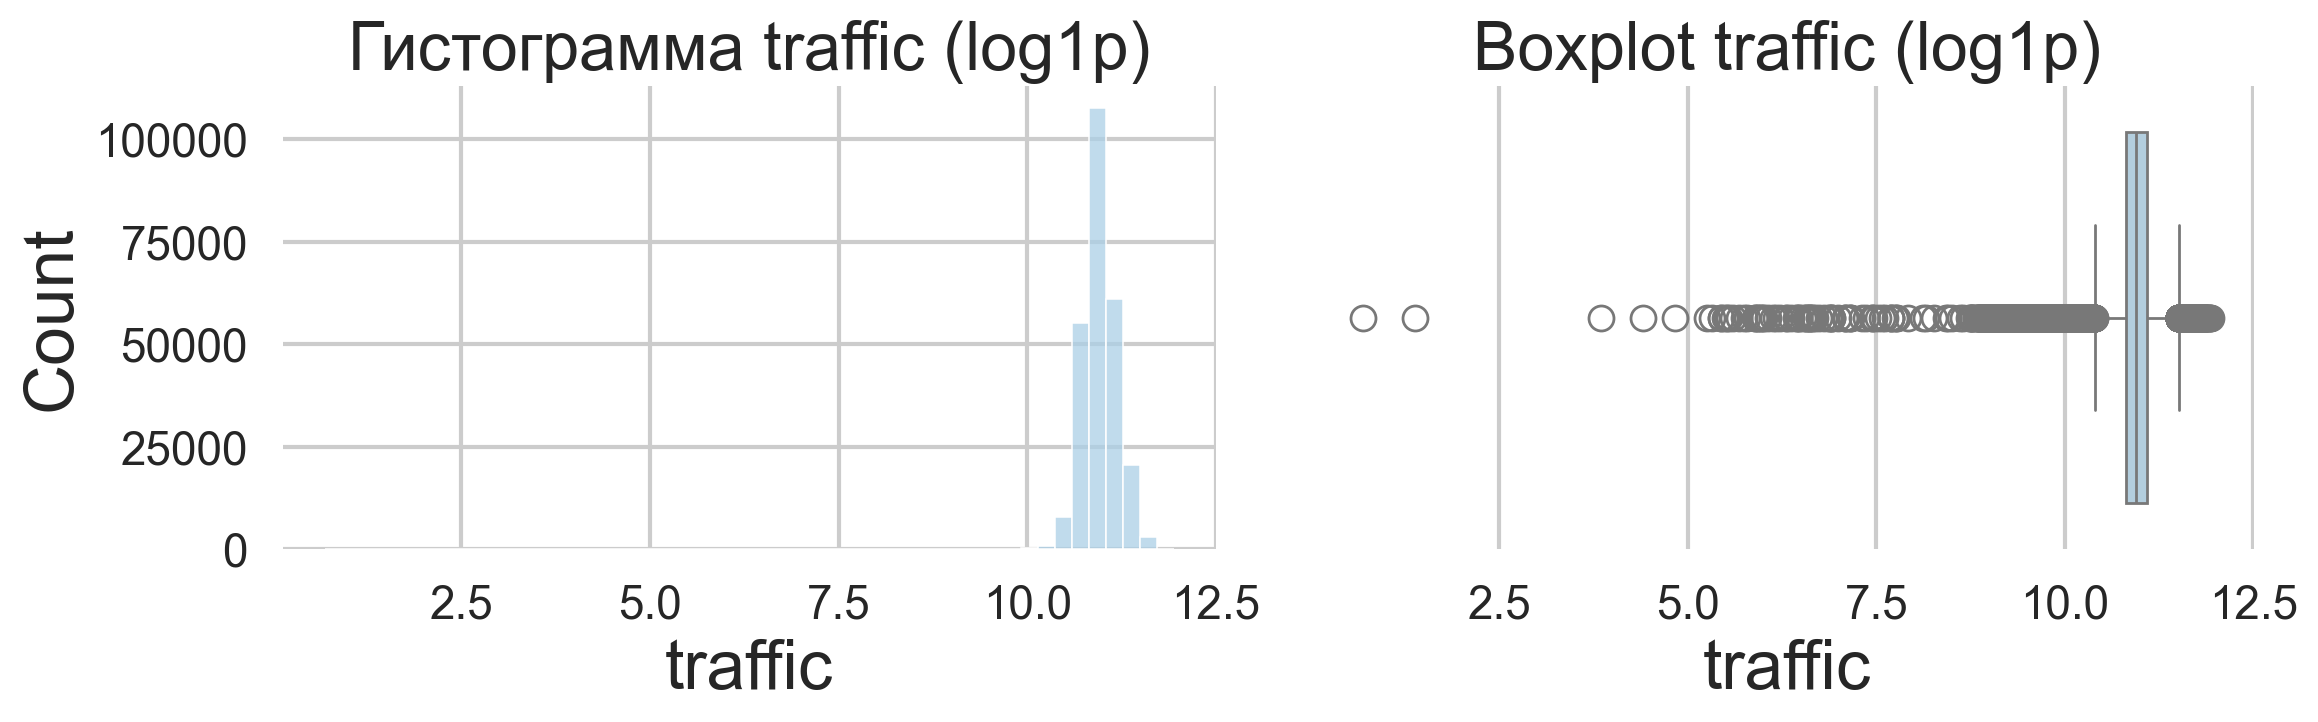

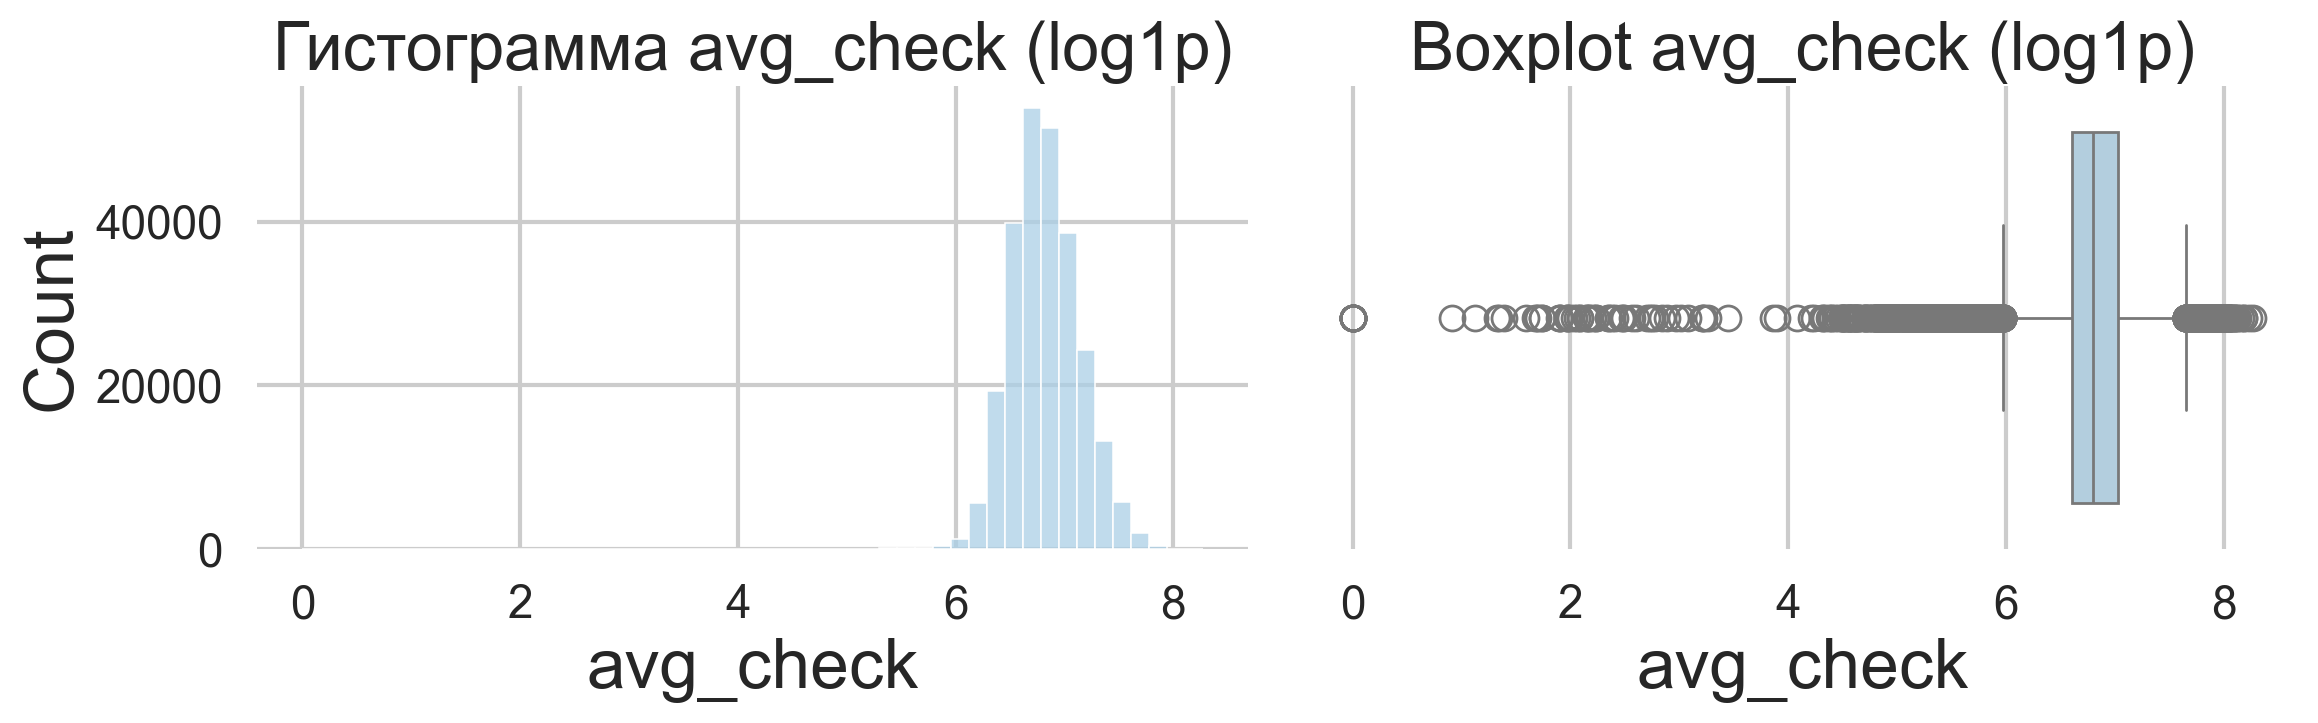

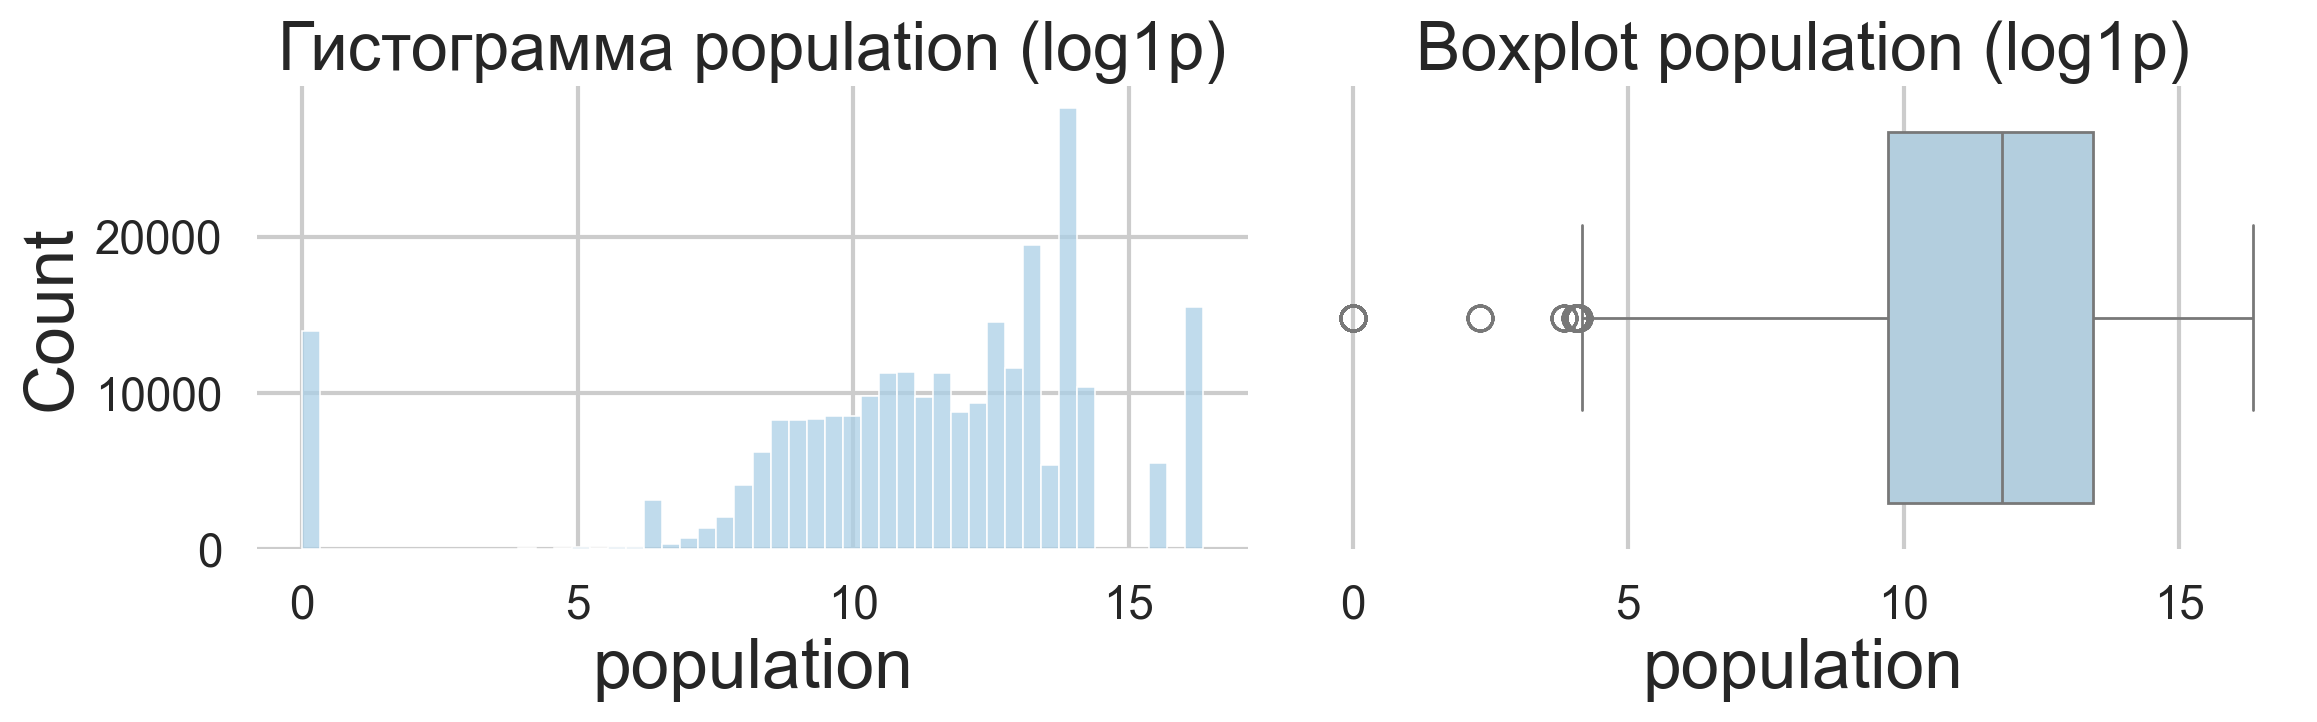

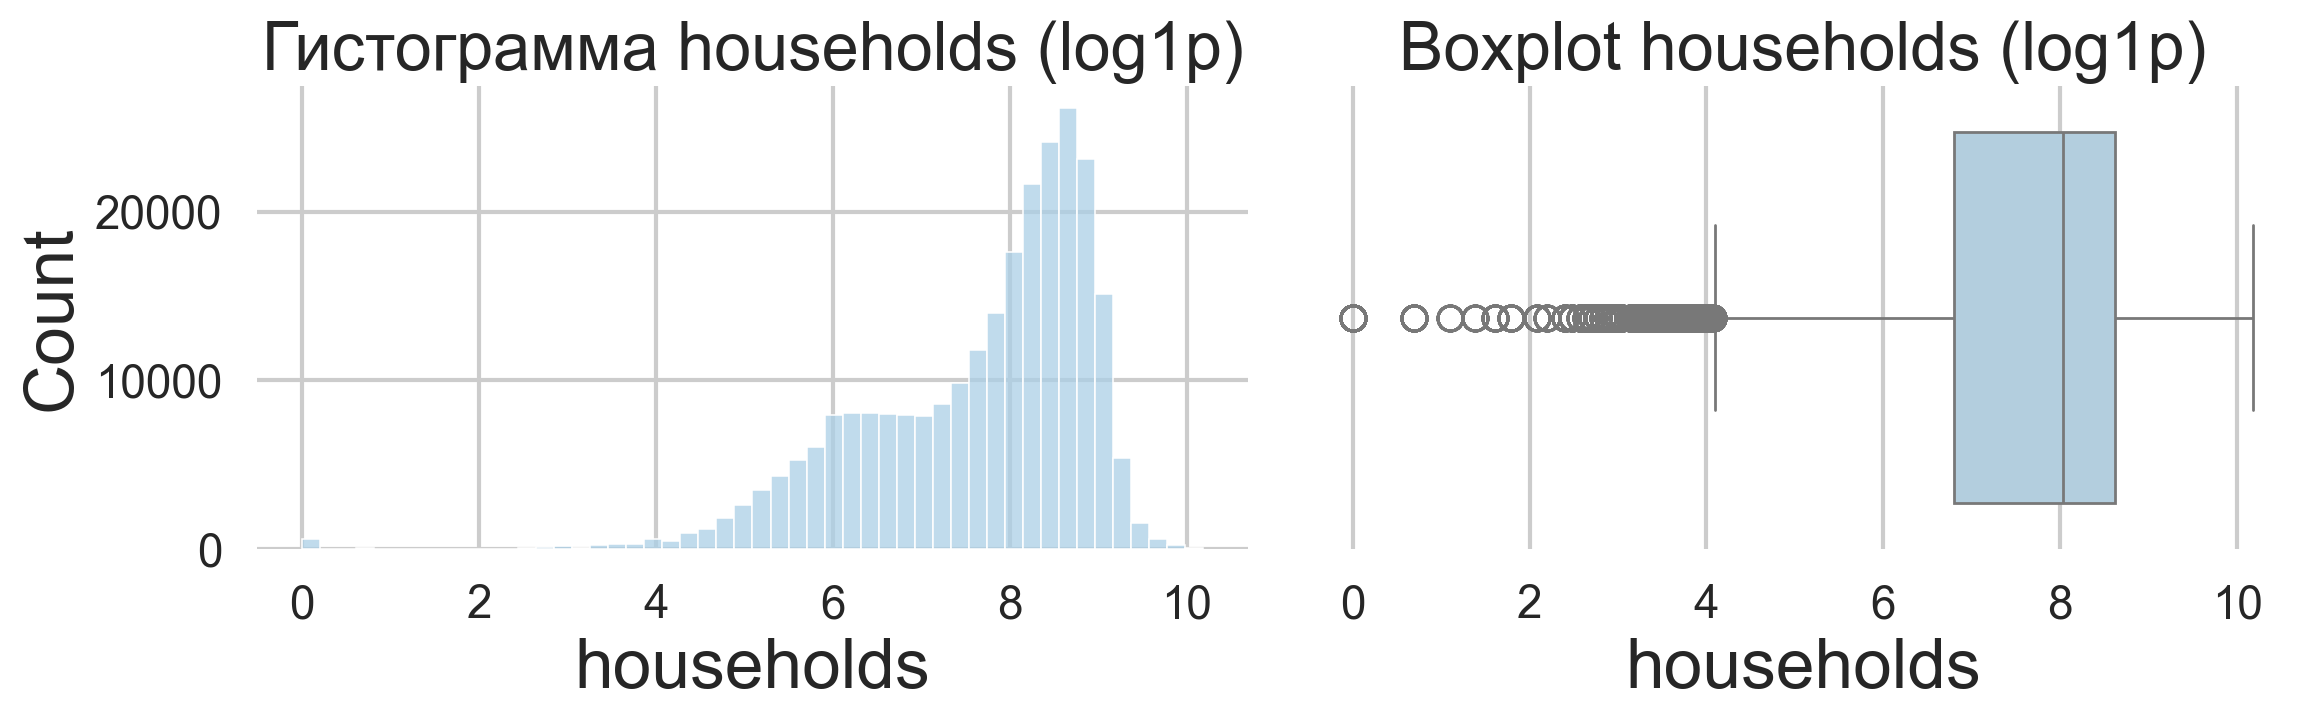

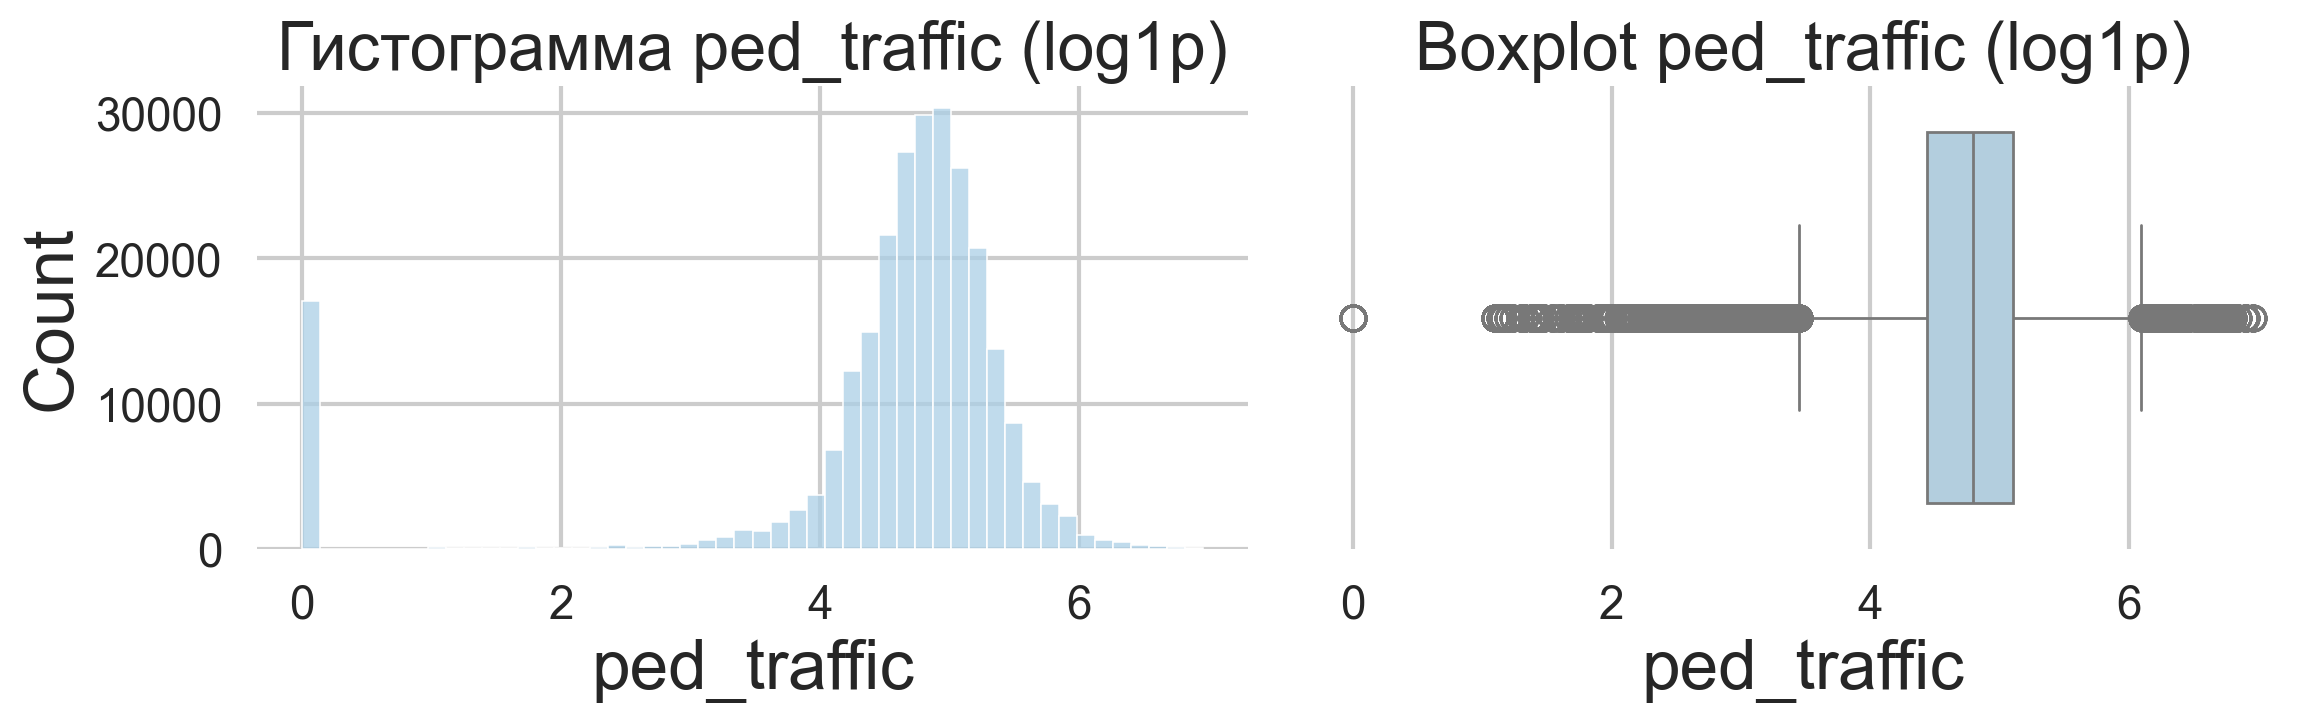

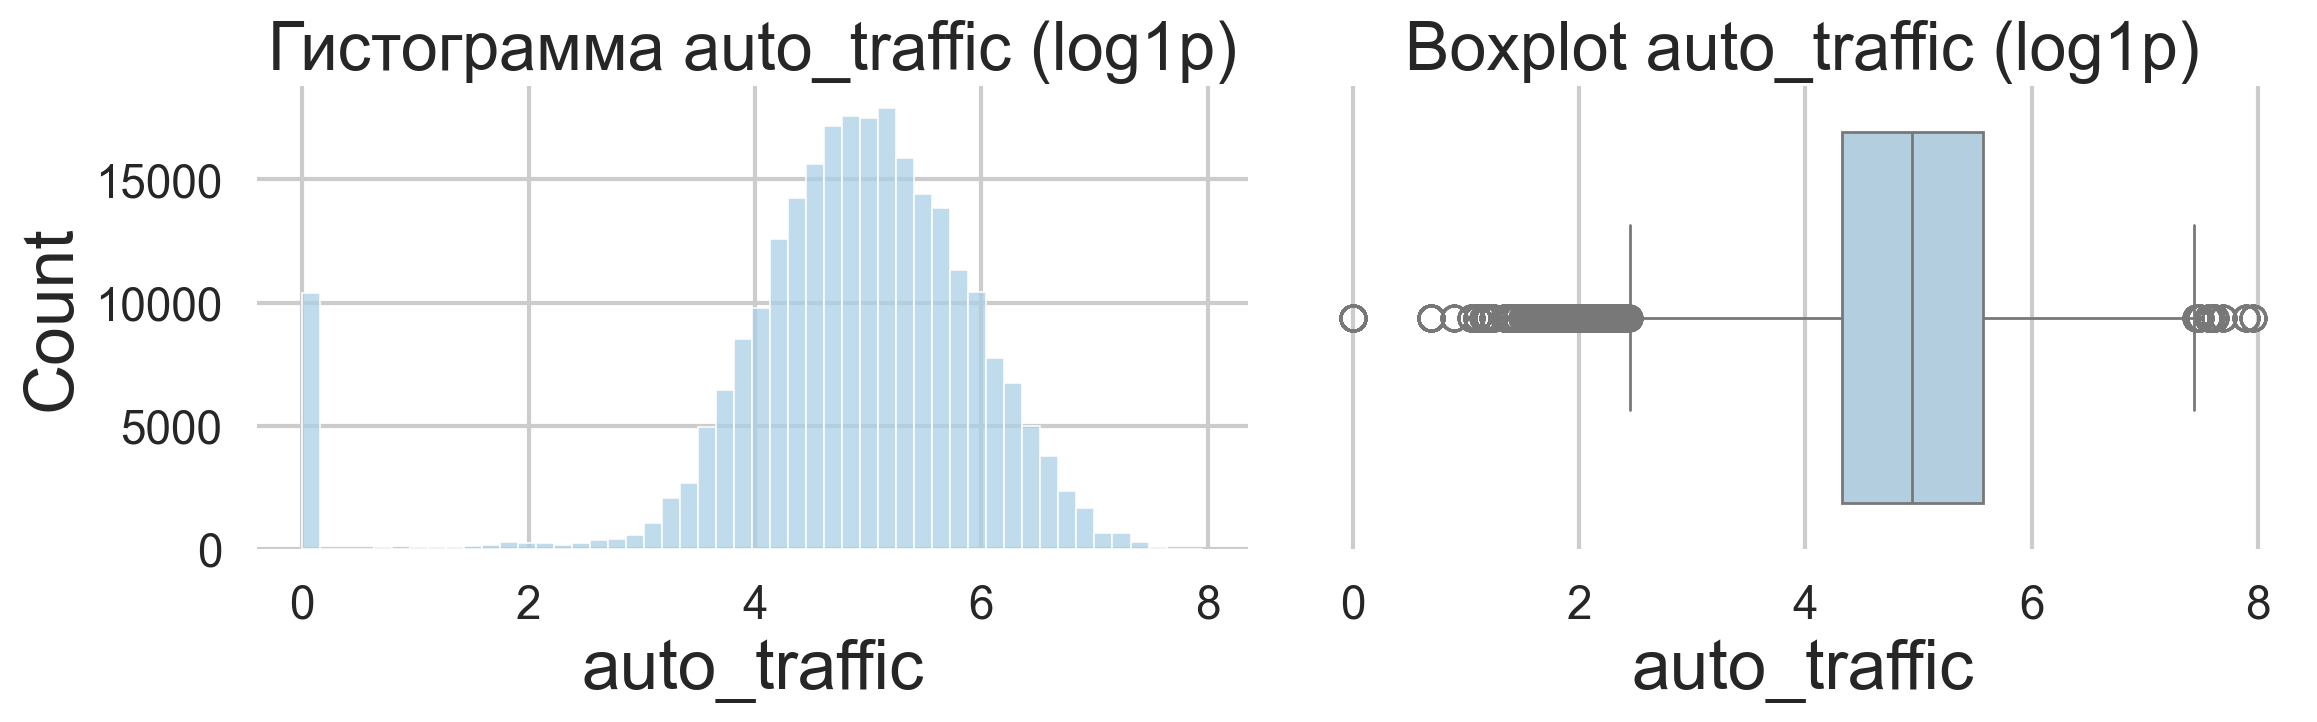

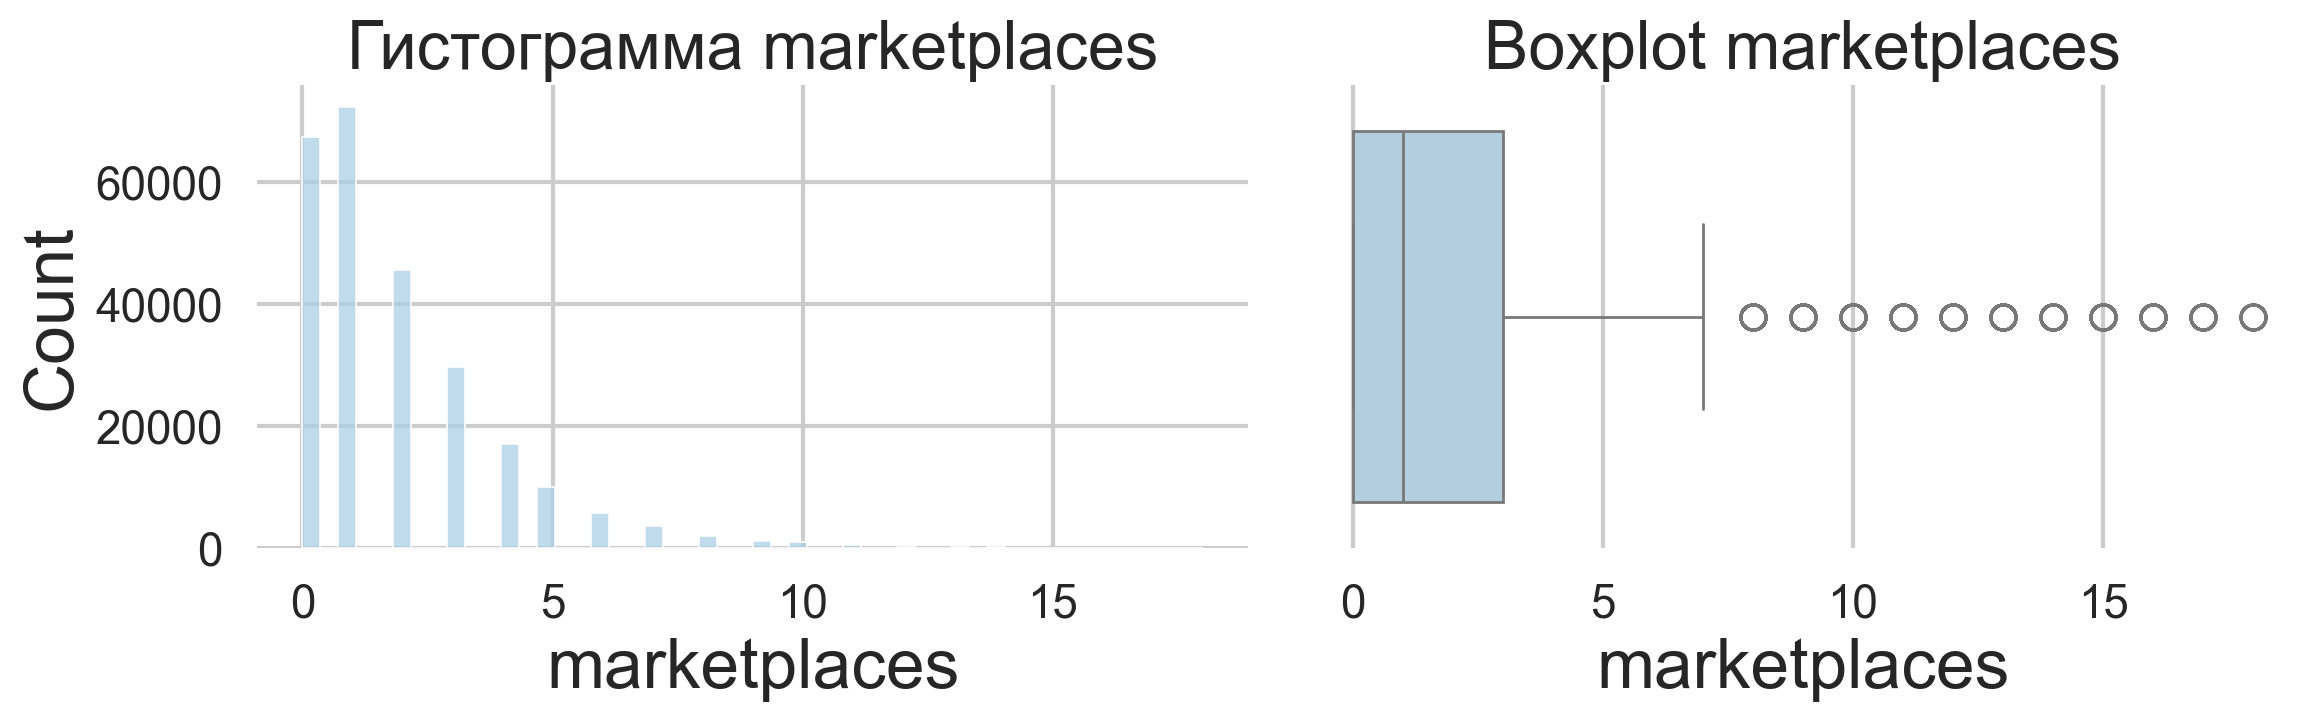

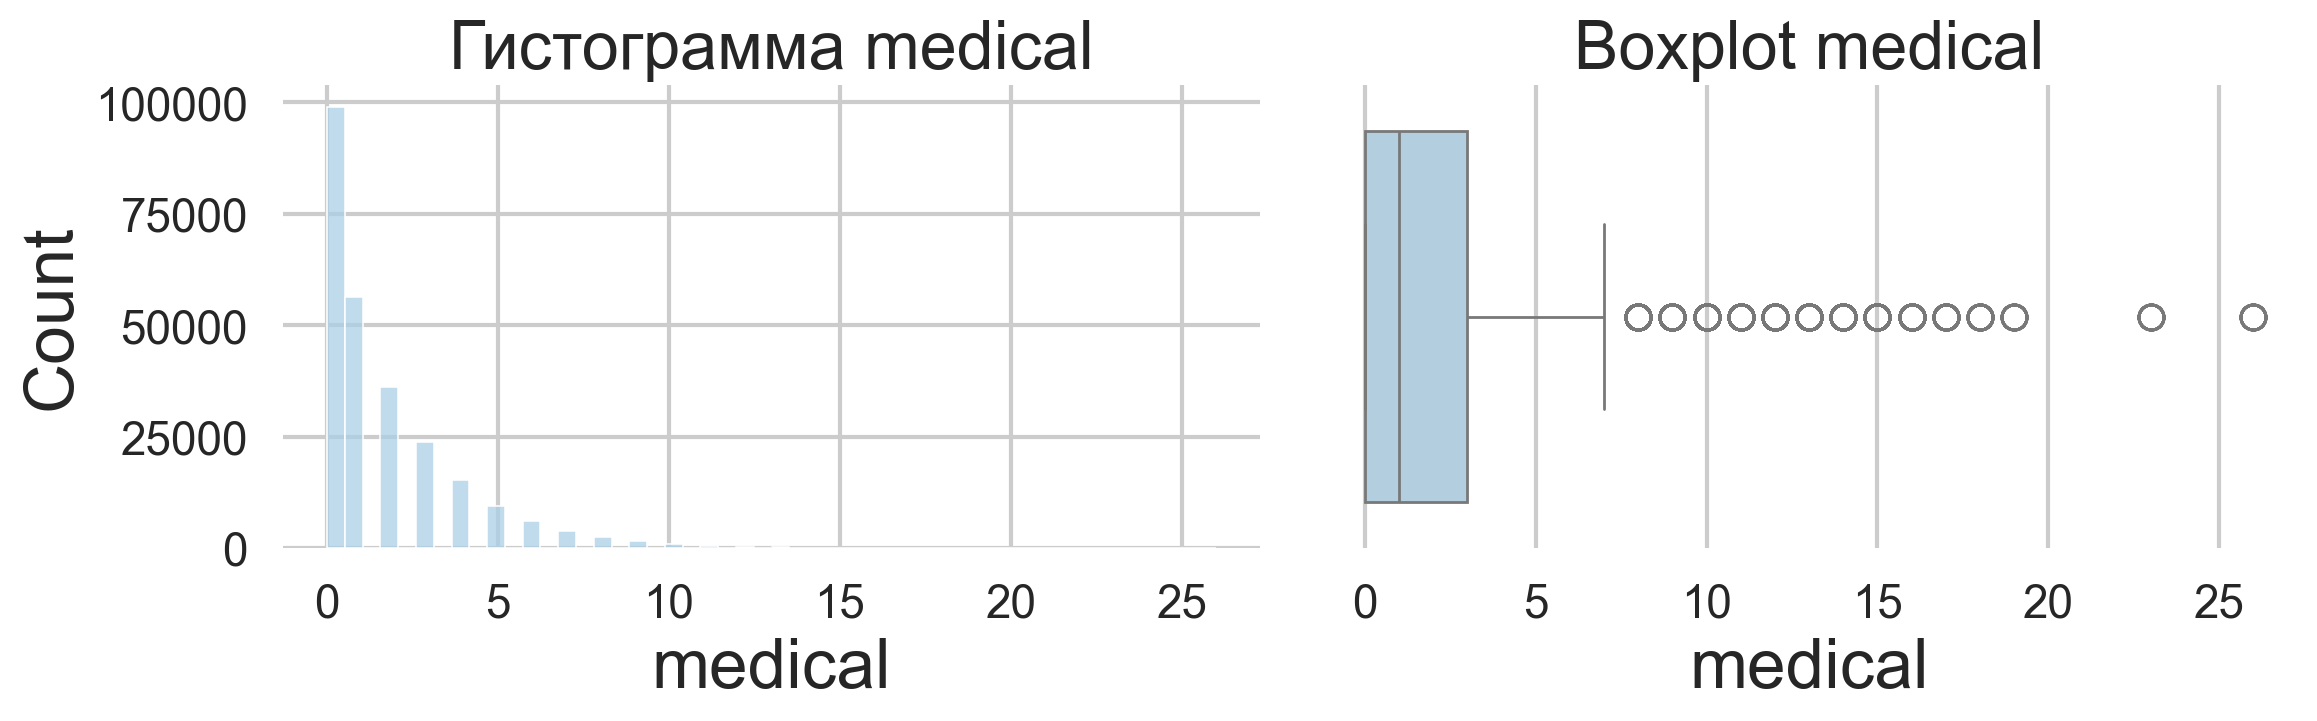

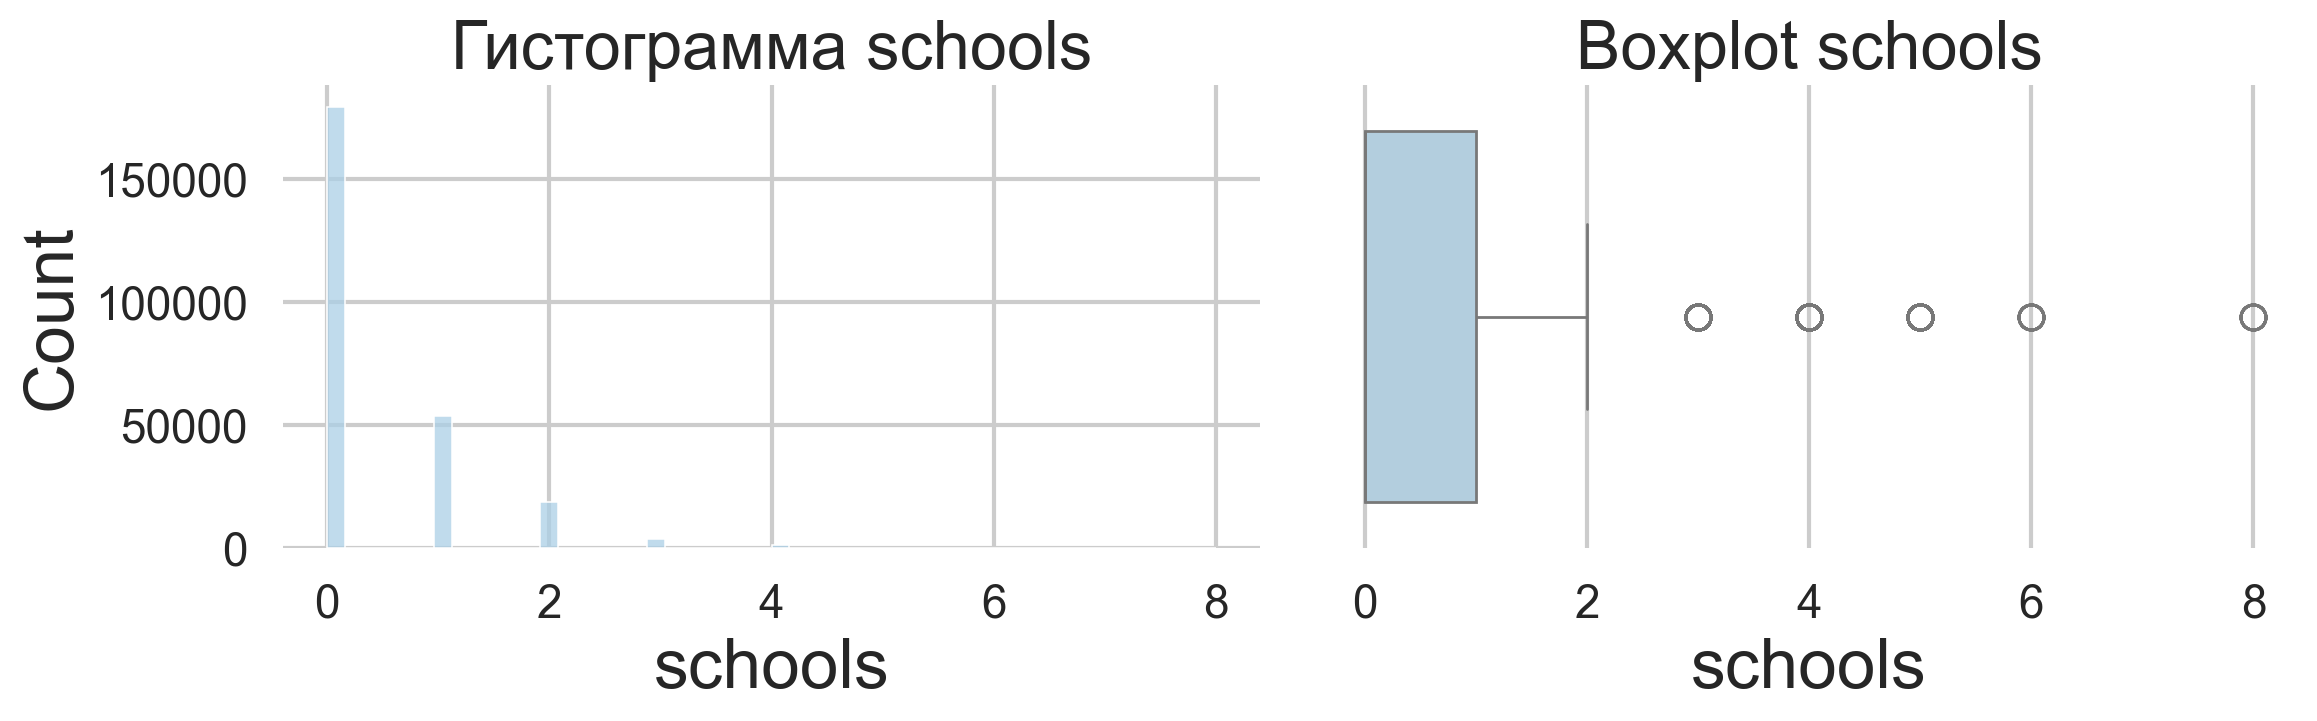

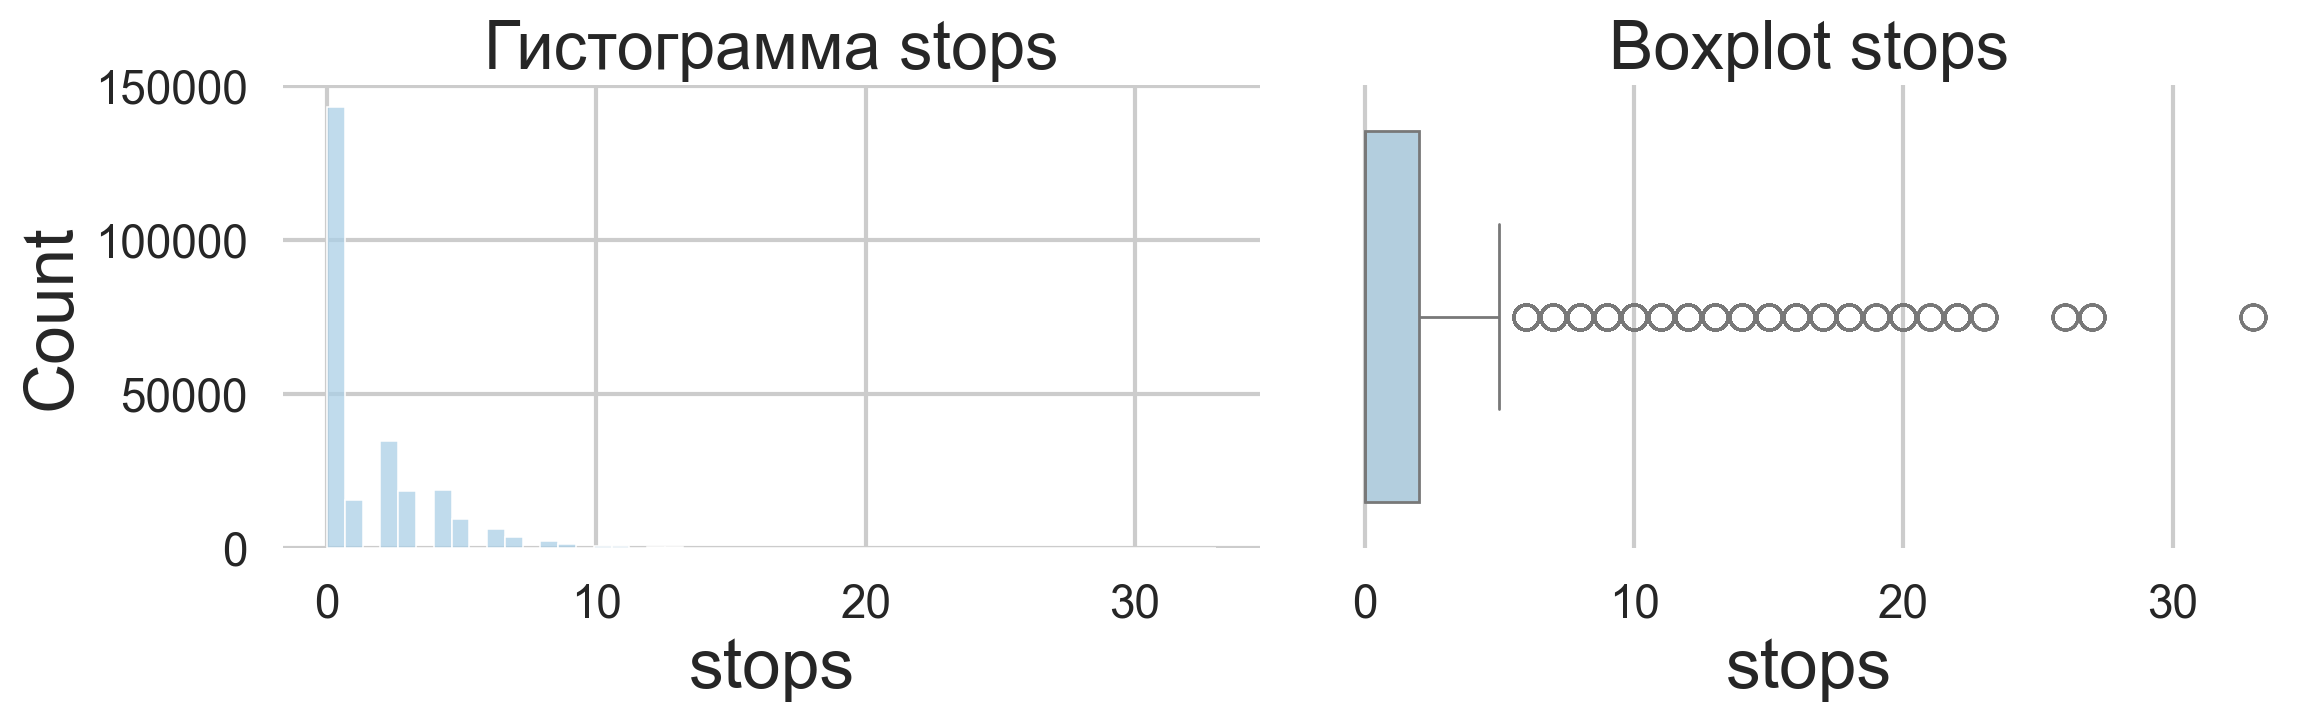

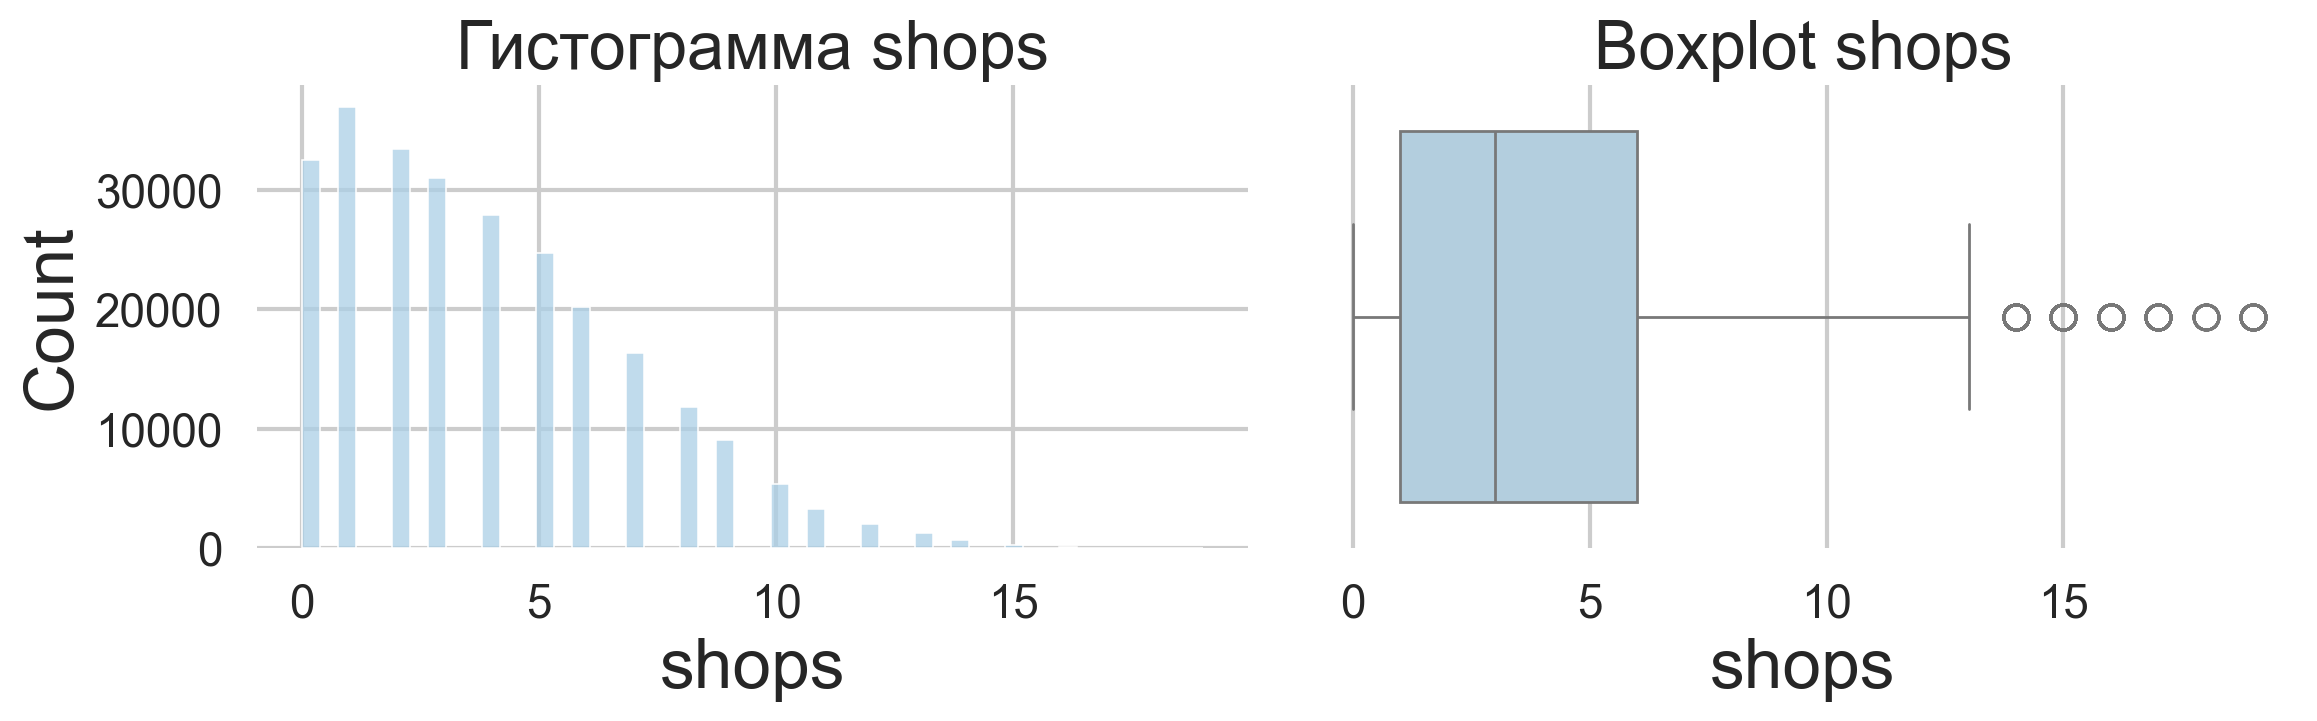

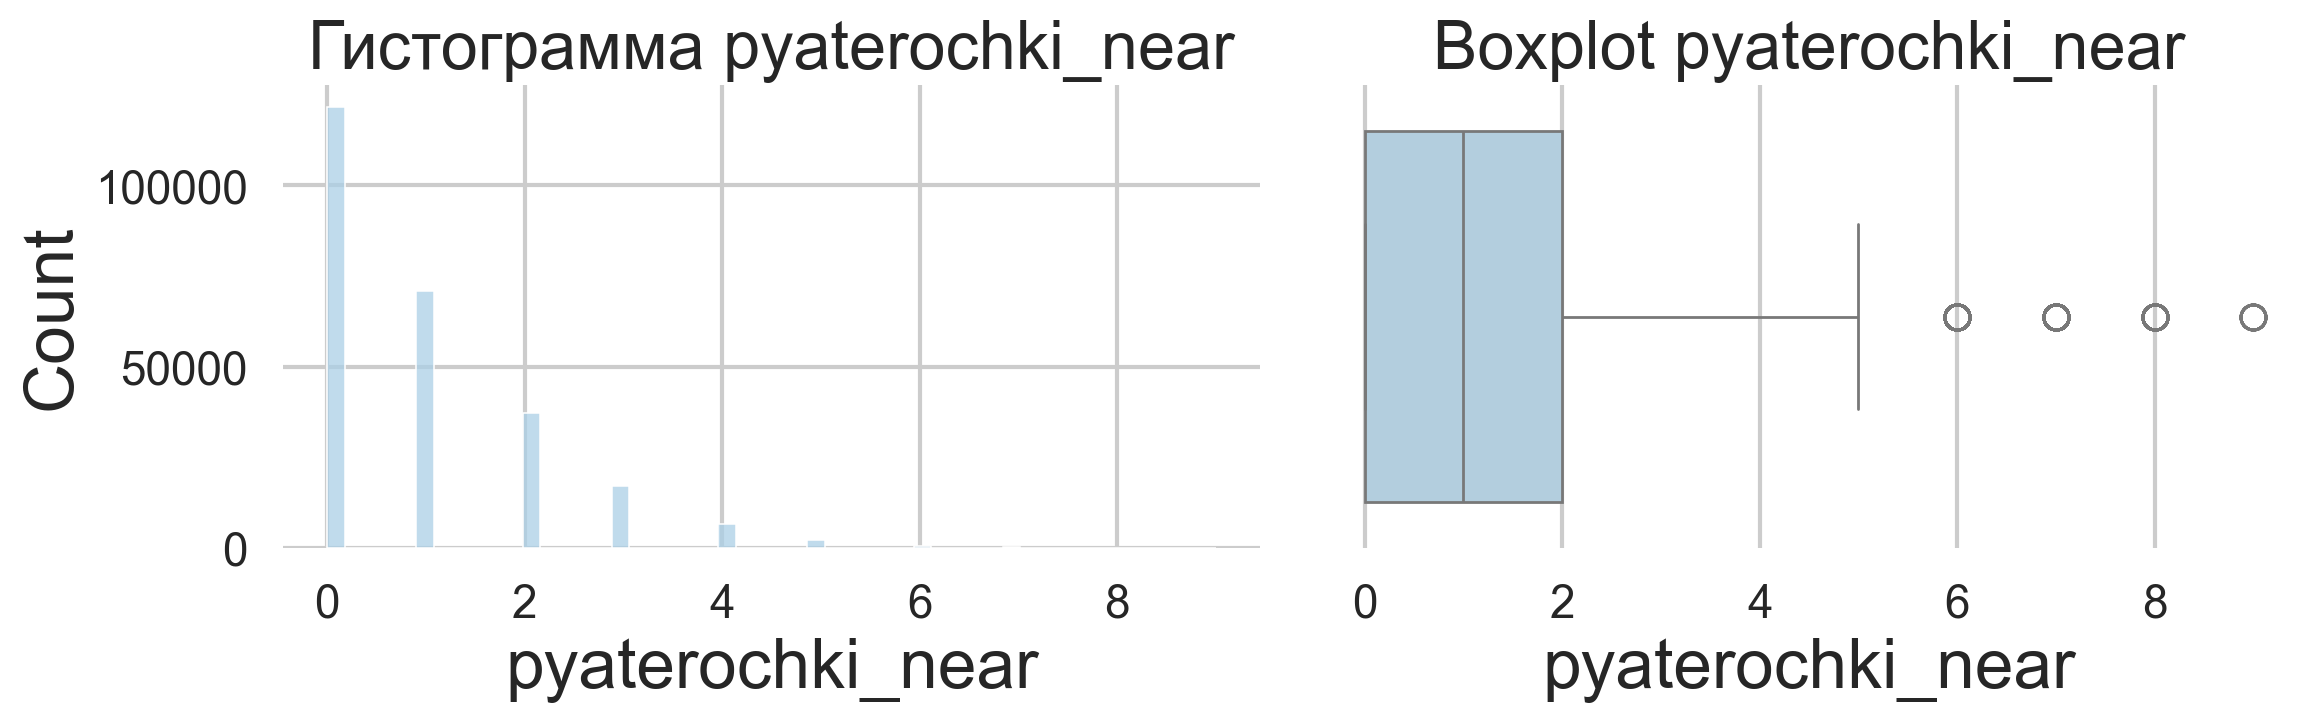

In [35]:
def plot_hist_box(data, col, log_transform=False, bins=50):
    fig, axes = plt.subplots(1,2, figsize=(12,4))
    x = data[col].dropna()
    if log_transform:
        x_to_plot = np.log1p(x)
        title_suffix = ' (log1p)'
    else:
        x_to_plot = x
        title_suffix = ''
    # hist + kde
    sns.histplot(x_to_plot, bins=bins, ax=axes[0])
    axes[0].set_title(f'Гистограмма {col}{title_suffix}')
    # boxplot
    sns.boxplot(x=x_to_plot, orient='h', ax=axes[1])
    axes[1].set_title(f'Boxplot {col}{title_suffix}')
    plt.tight_layout()
    plt.show()

# Список колонок для визуализации
visual_cols =  [cols[name] for name in [
    'Трафик',
    'Средний чек',
    'Численность населения',
    'Количество домохозяйств',
    'Трафик пеший, в час',
    'Трафик авто, в час',
    'Маркетплейсы, доставки, постаматы (100 м)',
    'Медицинские уч. и аптеки (300 м)',
    'Школы (300 м)',
    'Остановки (300 м)',
    'Продуктовые магазины (500 м)',
    'Пятерочки (500 м)'
]]

# Рисуем графики; для очевидно скошенных делаем логарифм
skewed = [cols[name] for name in ['Трафик','Средний чек','Численность населения','Количество домохозяйств',
          'Трафик пеший, в час','Трафик авто, в час']]
for c in visual_cols:
    if c not in df.columns:
        continue
    plot_hist_box(df, c, log_transform=(c in skewed))


### все более менее нормально кроме:
1. очень много значений для трафика между 5 и 10
2. тоже самое с чеком, распределения очень смещены вправо (много между 4 и 6)
3. хвост у домовладений, но это ожидаемо и он небольшой
4. у трафика по категориям то же самое что у чека и у самого трафика
5. много нулевого пешеходного и автомобильного трафика 


Посмотрим, что там по выбросам

In [39]:
def find_iqr_outliers(series, k=1.5):
    s = series.dropna()
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - k * iqr
    upper = q3 + k * iqr
    mask = (series < lower) | (series > upper)
    return mask, lower, upper, q1, q3, iqr

outlier_summary = []
outlier_masks = pd.DataFrame(index=df.index)

for c in visual_cols:
    if c not in df.columns:
        continue
    mask, lower, upper, q1, q3, iqr = find_iqr_outliers(df[c])
    outlier_masks[f'out_{c}'] = mask.fillna(False)
    count = mask.sum()
    pct = count / df.shape[0] * 100
    outlier_summary.append({
        'col': c, 'count': int(count), 'pct': pct,
        'q1': q1, 'q3': q3, 'iqr': iqr, 'lower': lower, 'upper': upper
    })

out_df = pd.DataFrame(outlier_summary).sort_values('pct', ascending=False)
display(out_df)


,col,count,pct,q1,q3,iqr,lower,upper
2,population,21045,8.197551,16675.000000,684709.000000,668034.000000,-985376.000000,1.686760e+06
5,auto_traffic,17013,6.626987,74.333333,262.666667,188.333334,-208.166668,5.451667e+02
9,stops,16433,6.401063,0.000000,2.000000,2.000000,-3.000000,5.000000e+00
4,ped_traffic,9749,3.797478,83.900000,163.357143,79.457143,-35.285714,2.825429e+02
1,avg_check,8573,3.339397,739.827669,1126.586033,386.758364,159.690124,1.706724e+03
0,traffic,8029,3.127495,49697.000000,65801.000000,16104.000000,25541.000000,8.995700e+04
7,medical,6455,2.514383,0.000000,3.000000,3.000000,-4.500000,7.500000e+00
6,marketplaces,5355,2.085906,0.000000,3.000000,3.000000,-4.500000,7.500000e+00
8,schools,5198,2.024750,0.000000,1.000000,1.000000,-1.500000,2.500000e+00
3,households,1801,0.701534,898.000000,5516.000000,4618.000000,-6029.000000,1.244300e+04


выше в таблице это:
1. `count` - Количество наблюдений (строк), которые считаются выбросами по правилу x < Q1−1.5IQR или x > Q3+1.5IQR
2. `pct` - То же самое, но в процентах: доля выбросов от общего числа строк. 
3. `q1` — Первый квартиль (25-я перцентиль); значение, ниже которого находится 25% данных.
4. `q3` — Третий квартиль (75-я перцентиль); значение, ниже которого находится 75% данных.
5. `iqr` — Межквартильный размах:
IQR = Q3 − Q1.
Показывает ширину коробки в boxplot.
6. `lower` — Нижняя теоретическая граница «усов» (граница определения выбросов):
lower = Q1 − 1.5·IQR.
Все значения ниже этой границы считаются выбросами.
7. `upper` — Верхняя теоретическая граница «усов»:
upper = Q3 + 1.5·IQR.
Все значения выше этой границы считаются выбросами.

## Сводная таблица

In [57]:
report = out_df.copy()
report['mean'] = df[report['col']].mean().values
report['median'] = df[report['col']].median().values
report['std'] = df[report['col']].std().values
report = report[['col','mean','median','std','count','pct','q1','q3','iqr','lower','upper']]
display(report)
report.to_csv('outlier_report_iqr.csv', index=False)


,col,mean,median,std,count,pct,q1,q3,iqr,lower,upper
2,population,1.184431e+06,131942.000000,3.003150e+06,21045,8.197551,16675.000000,684709.000000,668034.000000,-985376.000000,1.686760e+06
5,auto_traffic,2.042530e+02,139.800000,2.063808e+02,17013,6.626987,74.333333,262.666667,188.333334,-208.166668,5.451667e+02
9,stops,1.538351e+00,0.000000,2.375176e+00,16433,6.401063,0.000000,2.000000,2.000000,-3.000000,5.000000e+00
4,ped_traffic,1.290137e+02,120.050000,8.160198e+01,9749,3.797478,83.900000,163.357143,79.457143,-35.285714,2.825429e+02
1,avg_check,9.663075e+02,901.419357,3.236862e+02,8573,3.339397,739.827669,1126.586033,386.758364,159.690124,1.706724e+03
0,traffic,5.881353e+04,56632.000000,1.354604e+04,8029,3.127495,49697.000000,65801.000000,16104.000000,25541.000000,8.995700e+04
7,medical,1.696681e+00,1.000000,2.164835e+00,6455,2.514383,0.000000,3.000000,3.000000,-4.500000,7.500000e+00
6,marketplaces,1.875769e+00,1.000000,2.015292e+00,5355,2.085906,0.000000,3.000000,3.000000,-4.500000,7.500000e+00
8,schools,4.212556e-01,0.000000,7.446908e-01,5198,2.024750,0.000000,1.000000,1.000000,-1.500000,2.500000e+00
3,households,3.553130e+03,3072.000000,2.932750e+03,1801,0.701534,898.000000,5516.000000,4618.000000,-6029.000000,1.244300e+04


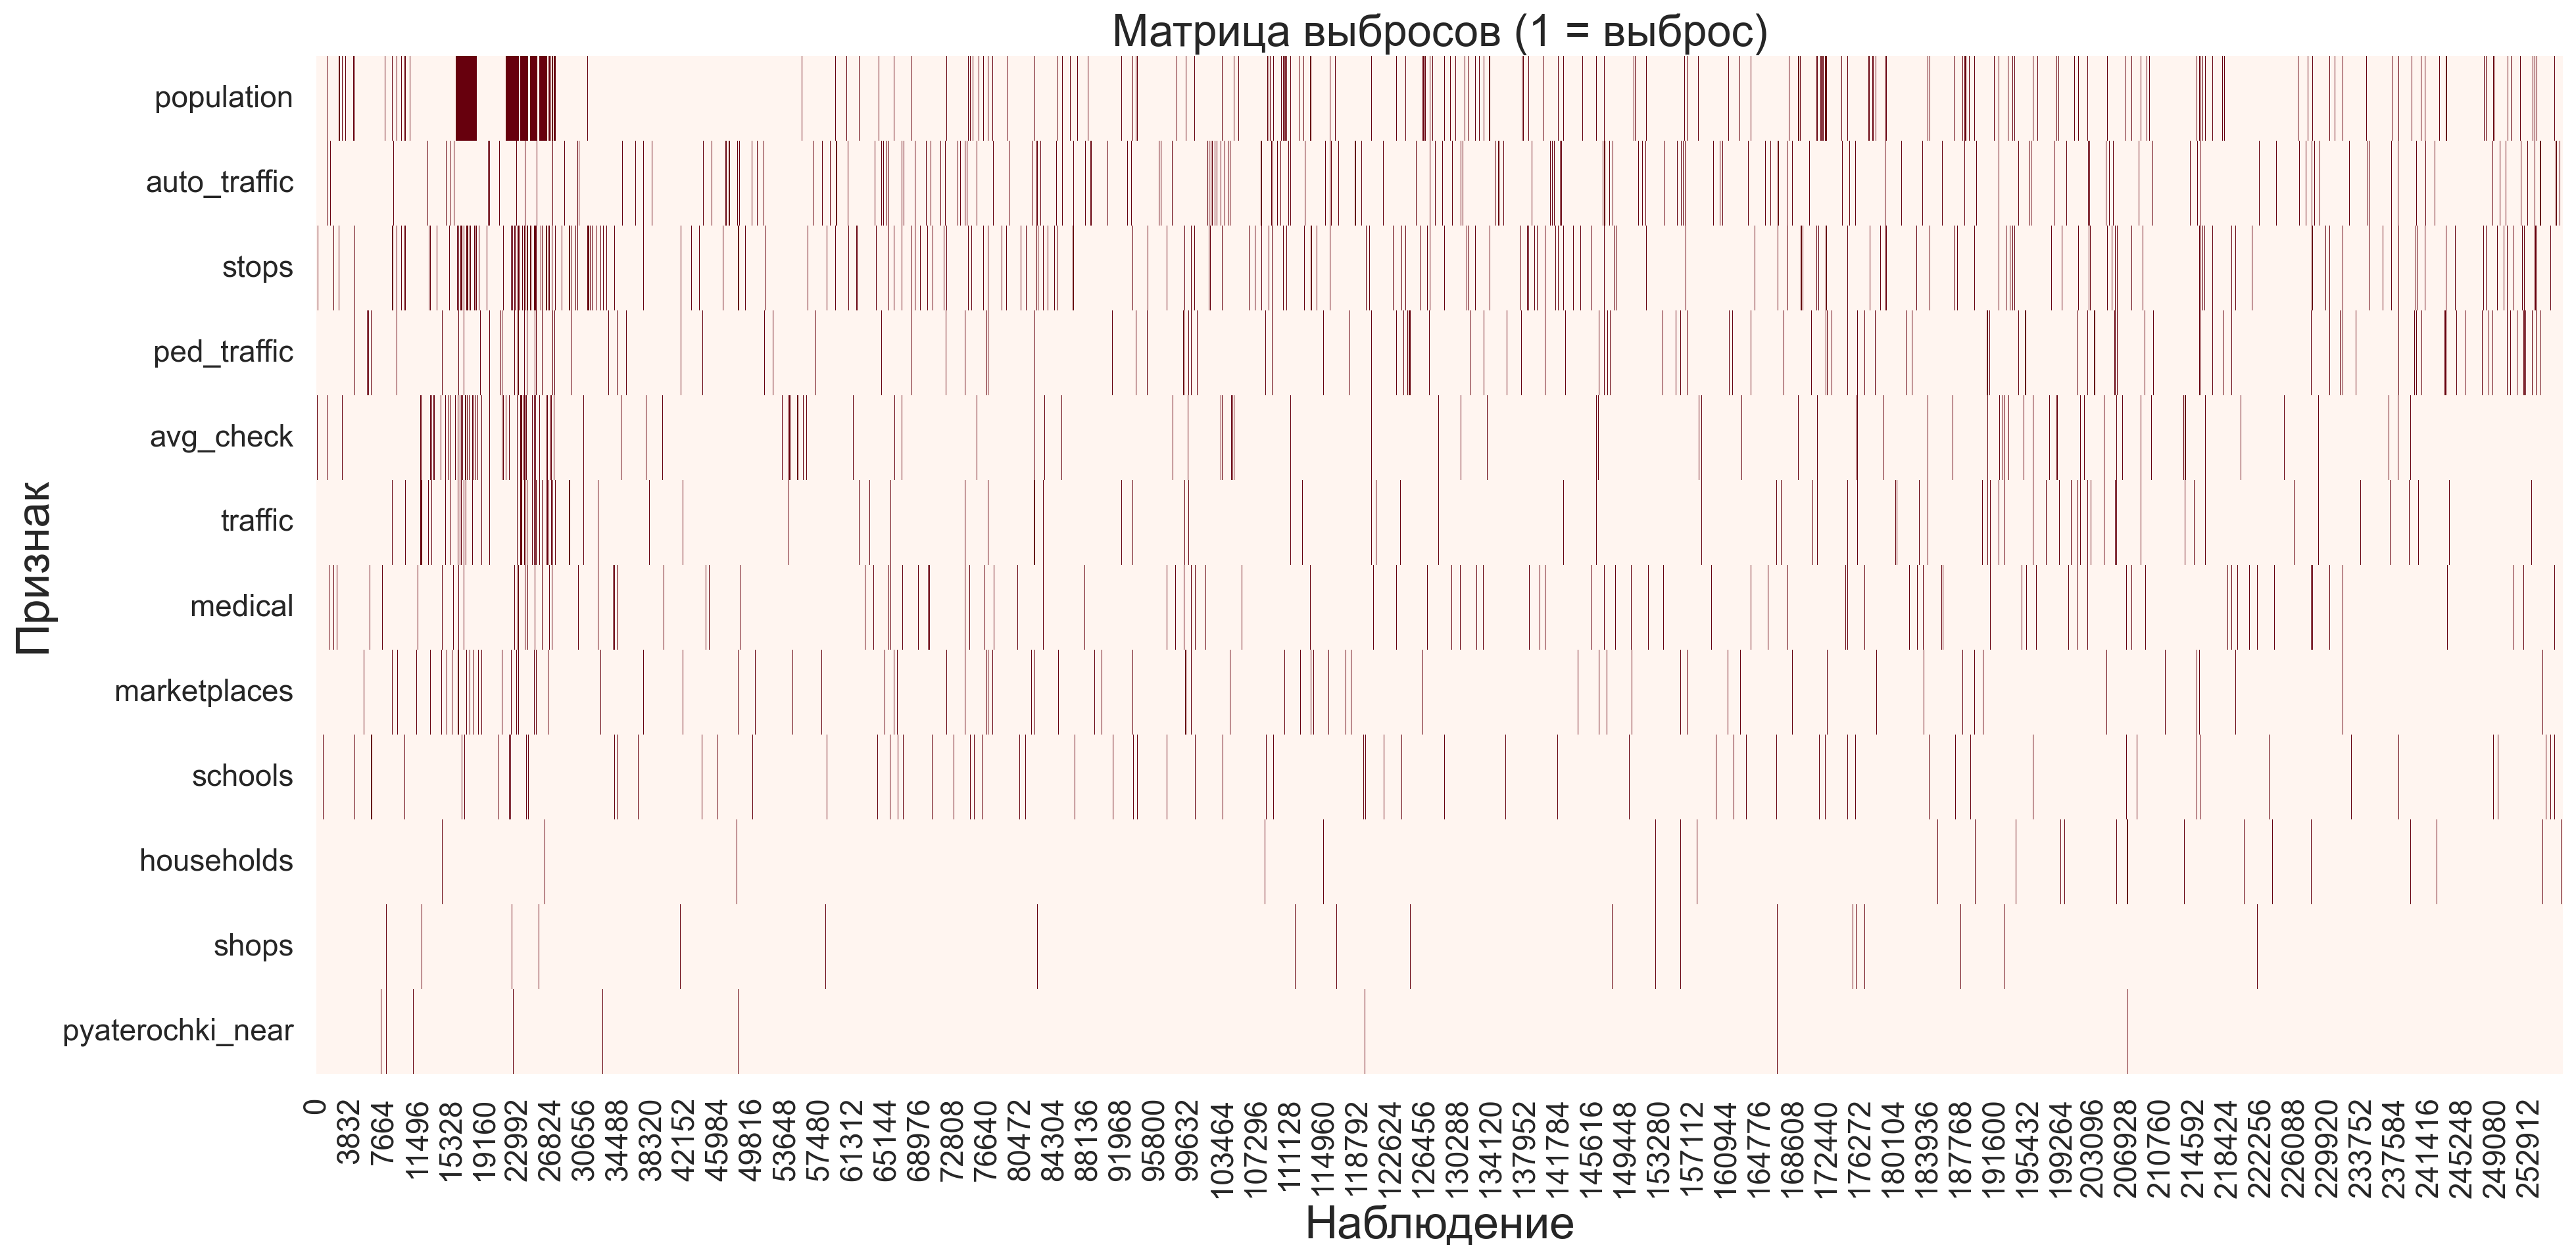

In [61]:
outlier_matrix = {}

for col in report['col'].values:
    s = df[col].dropna()
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    mask = (s < lower) | (s > upper)
    outlier_matrix[col] = mask.astype(int).values

outlier_df = pd.DataFrame(outlier_matrix)

plt.figure(figsize=(20,10))
sns.heatmap(outlier_df.T, cmap="Reds", cbar=False)
plt.title("Матрица выбросов (1 = выброс)")
plt.xlabel("Наблюдение")
plt.ylabel("Признак")
plt.tight_layout()
plt.show()


Это тепловая карта где красным помечены выбросы, но это необхективно (как могут быть выбросы в количестве жителей, например)

In [70]:
df = df[df['new_id'] != 13842]
df.to_csv(folder + "\cleaned_data_2.csv", index=False)

<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Daria\AppData\Local\Temp\ipykernel_16700\3810261246.py:2: SyntaxWarning: invalid escape sequence '\c'
  df.to_csv(folder + "\cleaned_data_2.csv", index=False)


In [5]:
df = pd.read_csv(folder + "\cleaned_data_2.csv")
df

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Daria\AppData\Local\Temp\ipykernel_10288\1133613017.py:1: SyntaxWarning: invalid escape sequence '\c'
  df = pd.read_csv(folder + "\cleaned_data_2.csv")


,new_id,month,traffic,avg_check,open_date,area,locality,region,population,households,ped_traffic,auto_traffic,marketplaces,medical,schools,stops,shops,pyaterochki_near
0,0,10,59662,823.060390,Средний по возрасту,Средний,Кавказская ст-ца,Краснодарский край,10177,608,76.900,200.333333,0,6,0,0,2,0
1,0,5,56674,859.361975,Средний по возрасту,Средний,Кавказская ст-ца,Краснодарский край,10177,608,76.900,200.333333,0,6,0,0,2,0
2,0,1,51488,763.937766,Средний по возрасту,Средний,Кавказская ст-ца,Краснодарский край,10177,608,76.900,200.333333,0,6,0,0,2,0
3,0,6,56693,836.362309,Средний по возрасту,Средний,Кавказская ст-ца,Краснодарский край,10177,608,76.900,200.333333,0,6,0,0,2,0
4,0,7,58128,845.257709,Средний по возрасту,Средний,Кавказская ст-ца,Краснодарский край,10177,608,76.900,200.333333,0,6,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256694,21742,10,51676,1167.101083,Новый,Средний,Октябрьский рп,Волгоградская обл,6071,262,125.375,243.333333,1,1,0,0,1,0
256695,21742,11,51516,1252.914118,Новый,Средний,Октябрьский рп,Волгоградская обл,6071,262,125.375,243.333333,1,1,0,0,1,0
256696,21742,9,49593,1130.823998,Новый,Средний,Октябрьский рп,Волгоградская обл,6071,262,125.375,243.333333,1,1,0,0,1,0
256697,21742,12,52115,1461.929305,Новый,Средний,Октябрьский рп,Волгоградская обл,6071,262,125.375,243.333333,1,1,0,0,1,0


## Корреляции

<Axes: >

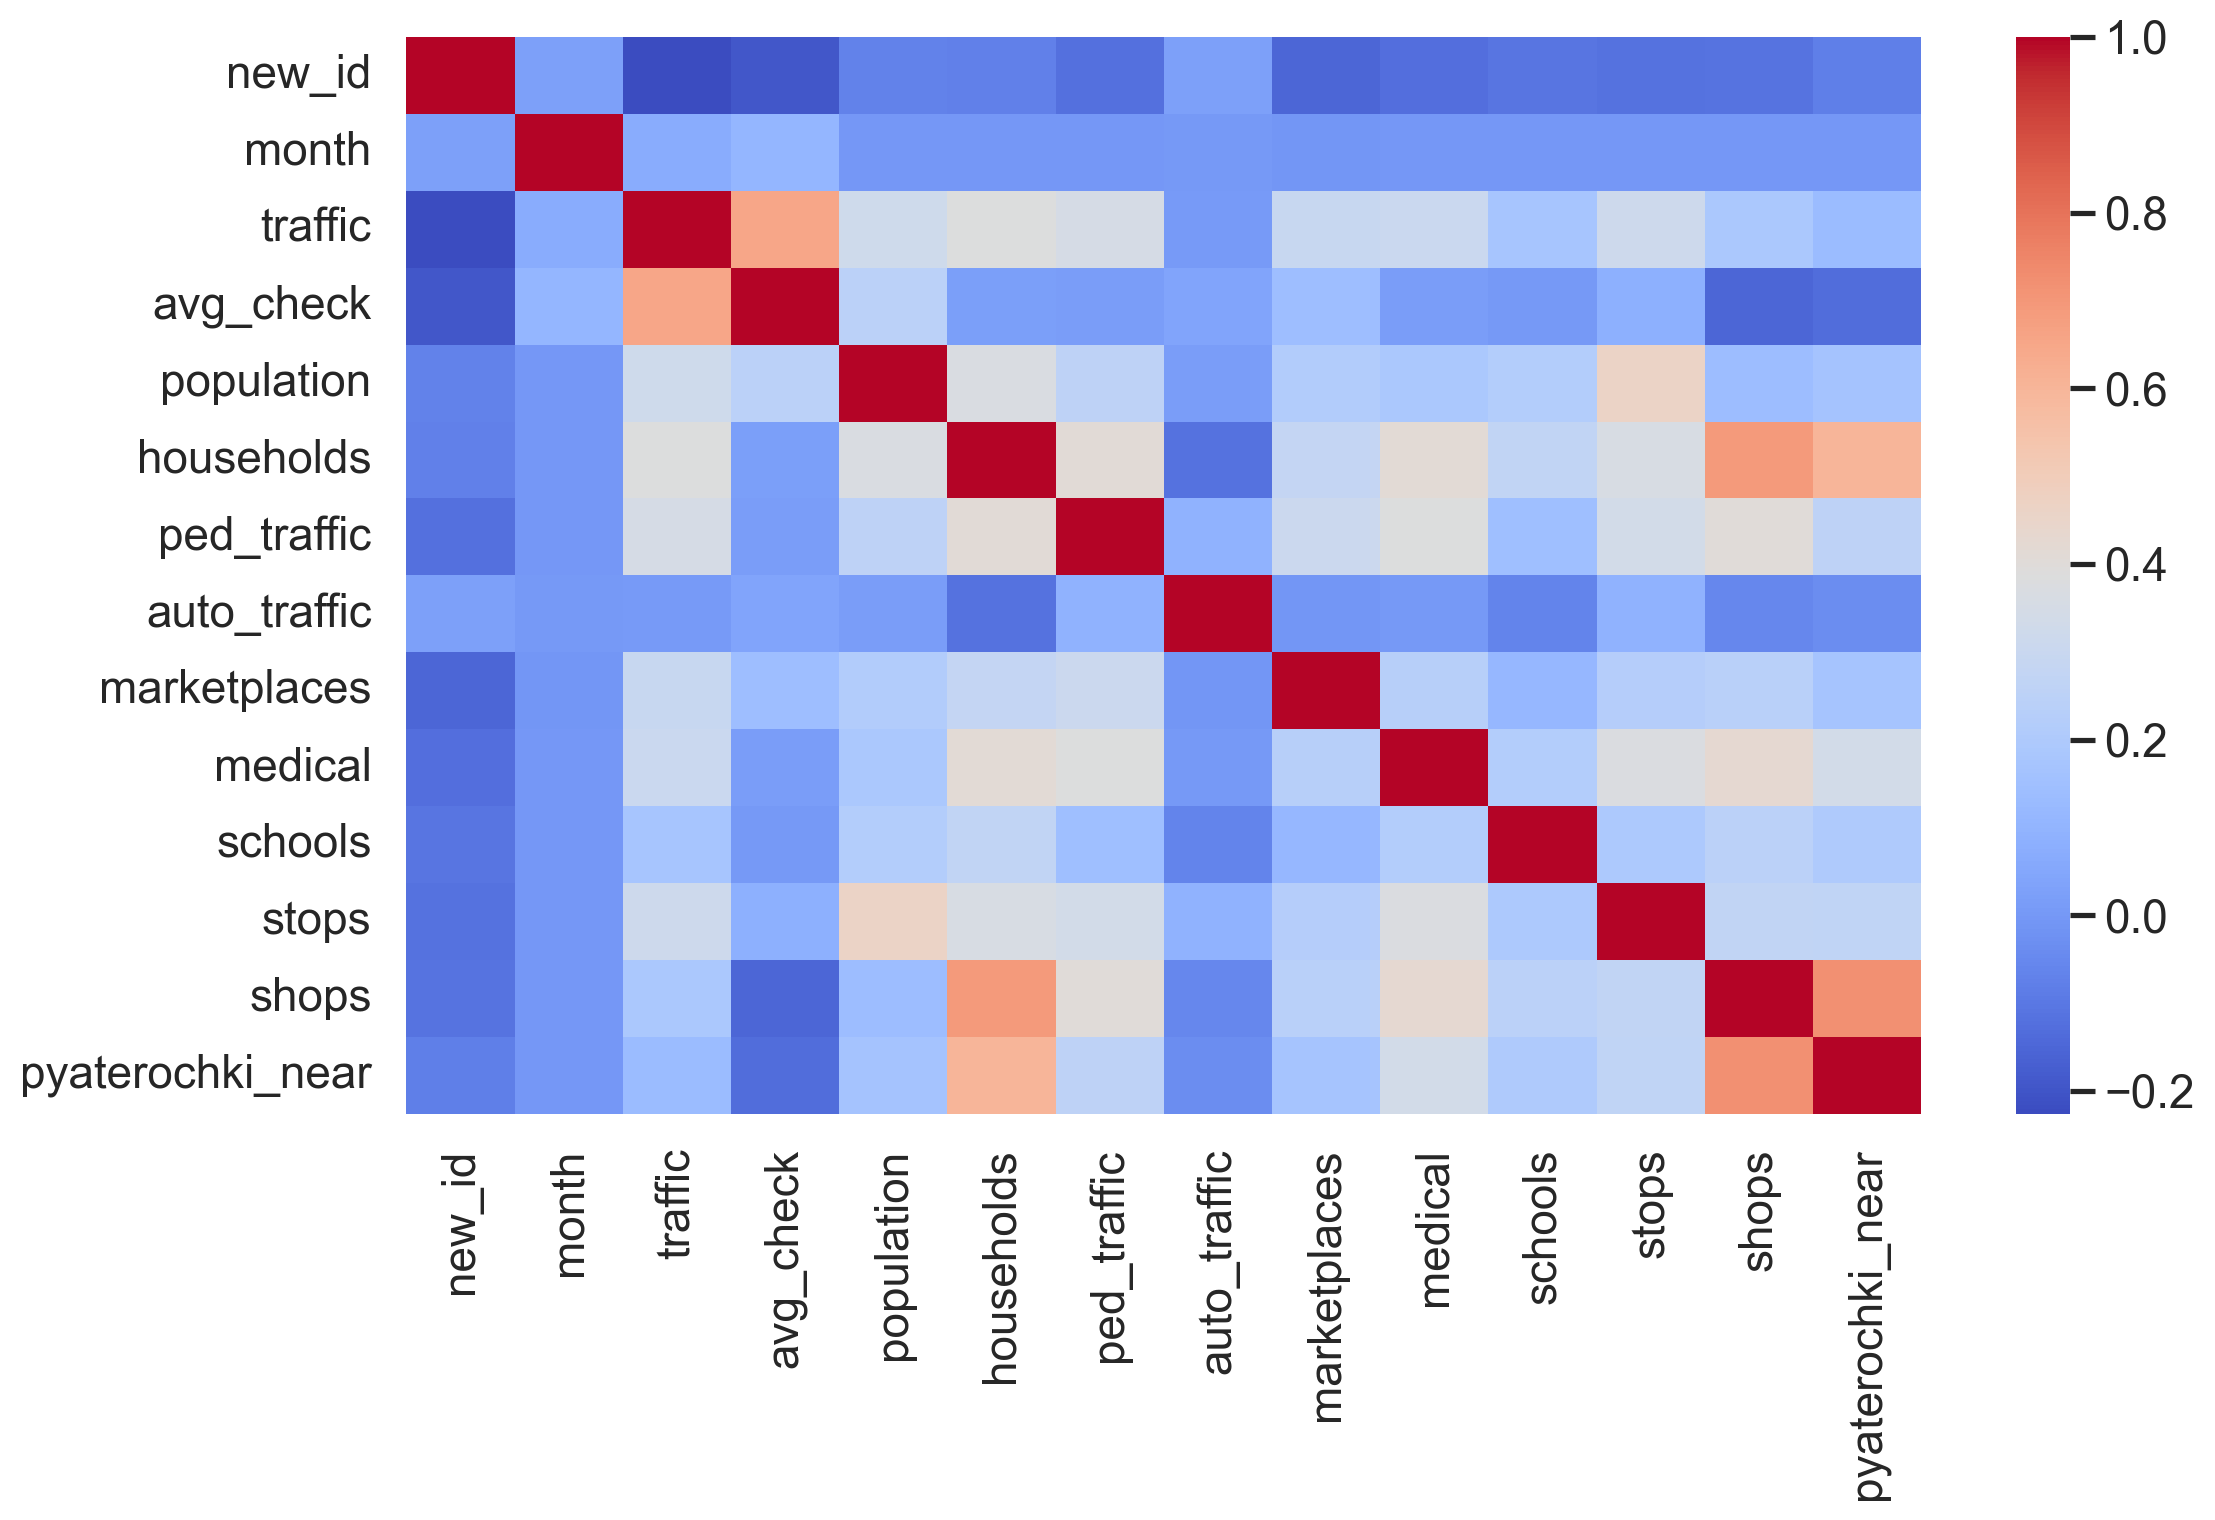

In [72]:
import seaborn as sns
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=False, cmap="coolwarm")


In [7]:
import statsmodels.api as sm

X = df[[col for col in visual_cols if col != 'traffic']]
X = sm.add_constant(X)
y = df['traffic']

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                traffic   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                 3.952e+04
Date:                Tue, 25 Nov 2025   Prob (F-statistic):               0.00
Time:                        14:52:51   Log-Likelihood:            -2.6793e+06
No. Observations:              256699   AIC:                         5.359e+06
Df Residuals:                  256687   BIC:                         5.359e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              2.37e+04     63.933  

коэффициент детерминации R² = 0.629, что означает, что около 63% вариации трафика объясняется включёнными признаками. Для реальных операционных данных такой результат можно считать удовлетворительным.


### Объекты e-commerce (marketplaces)

Коэффициент равен 357.21. Наличие одного объекта e-commerce в пределах 100 м ассоциировано с увеличением трафика на `357 человек`. Это существенный эффект, подтверждающий взаимное усиление точек притяжения в городской среде.
### Медицинские учреждения и аптеки (medical)

Коэффициент равен 601.02. Наличие одного медицинского объекта в радиусе 300 м связано с ростом трафика на `600 человек`. Переменная обладает высоким вкладом в прогноз.
### Школы (schools)

Коэффициент равен 996.18. Наличие одной школы ассоциируется с увеличением трафика почти на `1000 человек`. Это один из наиболее сильных и выраженных факторов социального окружения.
### Остановки транспорта (stops)

Коэффициент равен 535.30. Наличие остановки в пределах 300 м связано с увеличением трафика на `535 человек`. Переменная отражает значимость транспортной доступности.

### Продуктовые магазины-конкуренты (shops)

Коэффициент отрицательный (–85.40). Каждое дополнительное конкурентное торговое заведение в радиусе 500 м связано со снижением трафика примерно на 85 человек. Ожидаемый результат, подтверждающий наличие конкуренции в пределах локальных рынков.

---
# Общий вывод

Наиболее сильные положительные эффекты принадлежат школам, медицинским объектам, остановкам и объектам e-commerce. Пешеходная доступность также играет важную роль. Автомобильный поток и количество конкурентов связаны с уменьшением трафика. В совокупности эти результаты подтверждают гипотезу о значимости социально-инфраструктурного окружения в формировании клиентского потока.


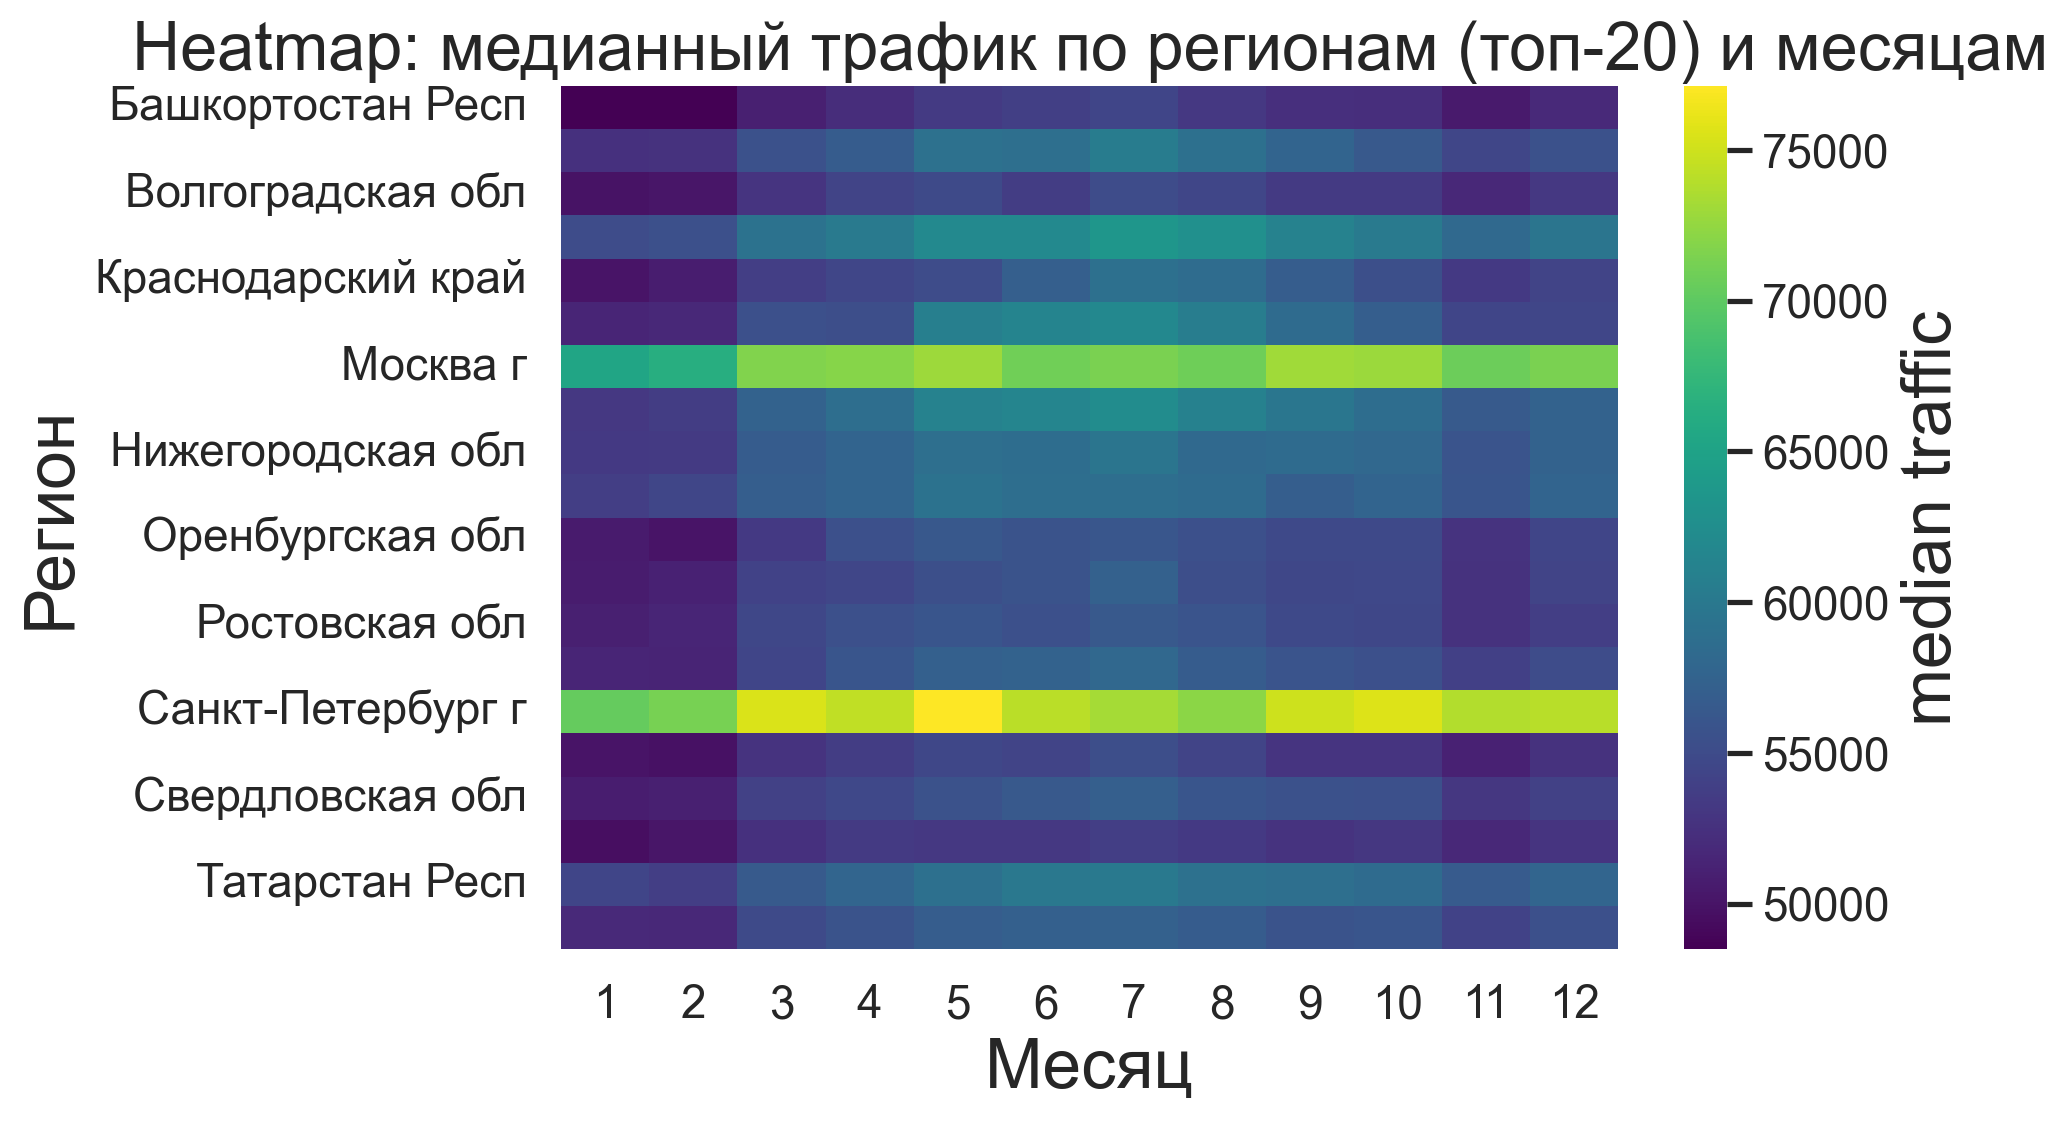

In [18]:
top_regions = df['region'].value_counts().head(20).index
pivot = df[df['region'].isin(top_regions)].groupby(['region','month'])['traffic'].median().unstack(fill_value=np.nan)
plt.figure(figsize=(10,6))
sns.heatmap(pivot, cmap='viridis', cbar_kws={'label':'median traffic'})
plt.title('Heatmap: медианный трафик по регионам (топ-20) и месяцам')
plt.ylabel('Регион')
plt.xlabel('Месяц')
plt.tight_layout()
plt.show()

то же самое без мск и питера

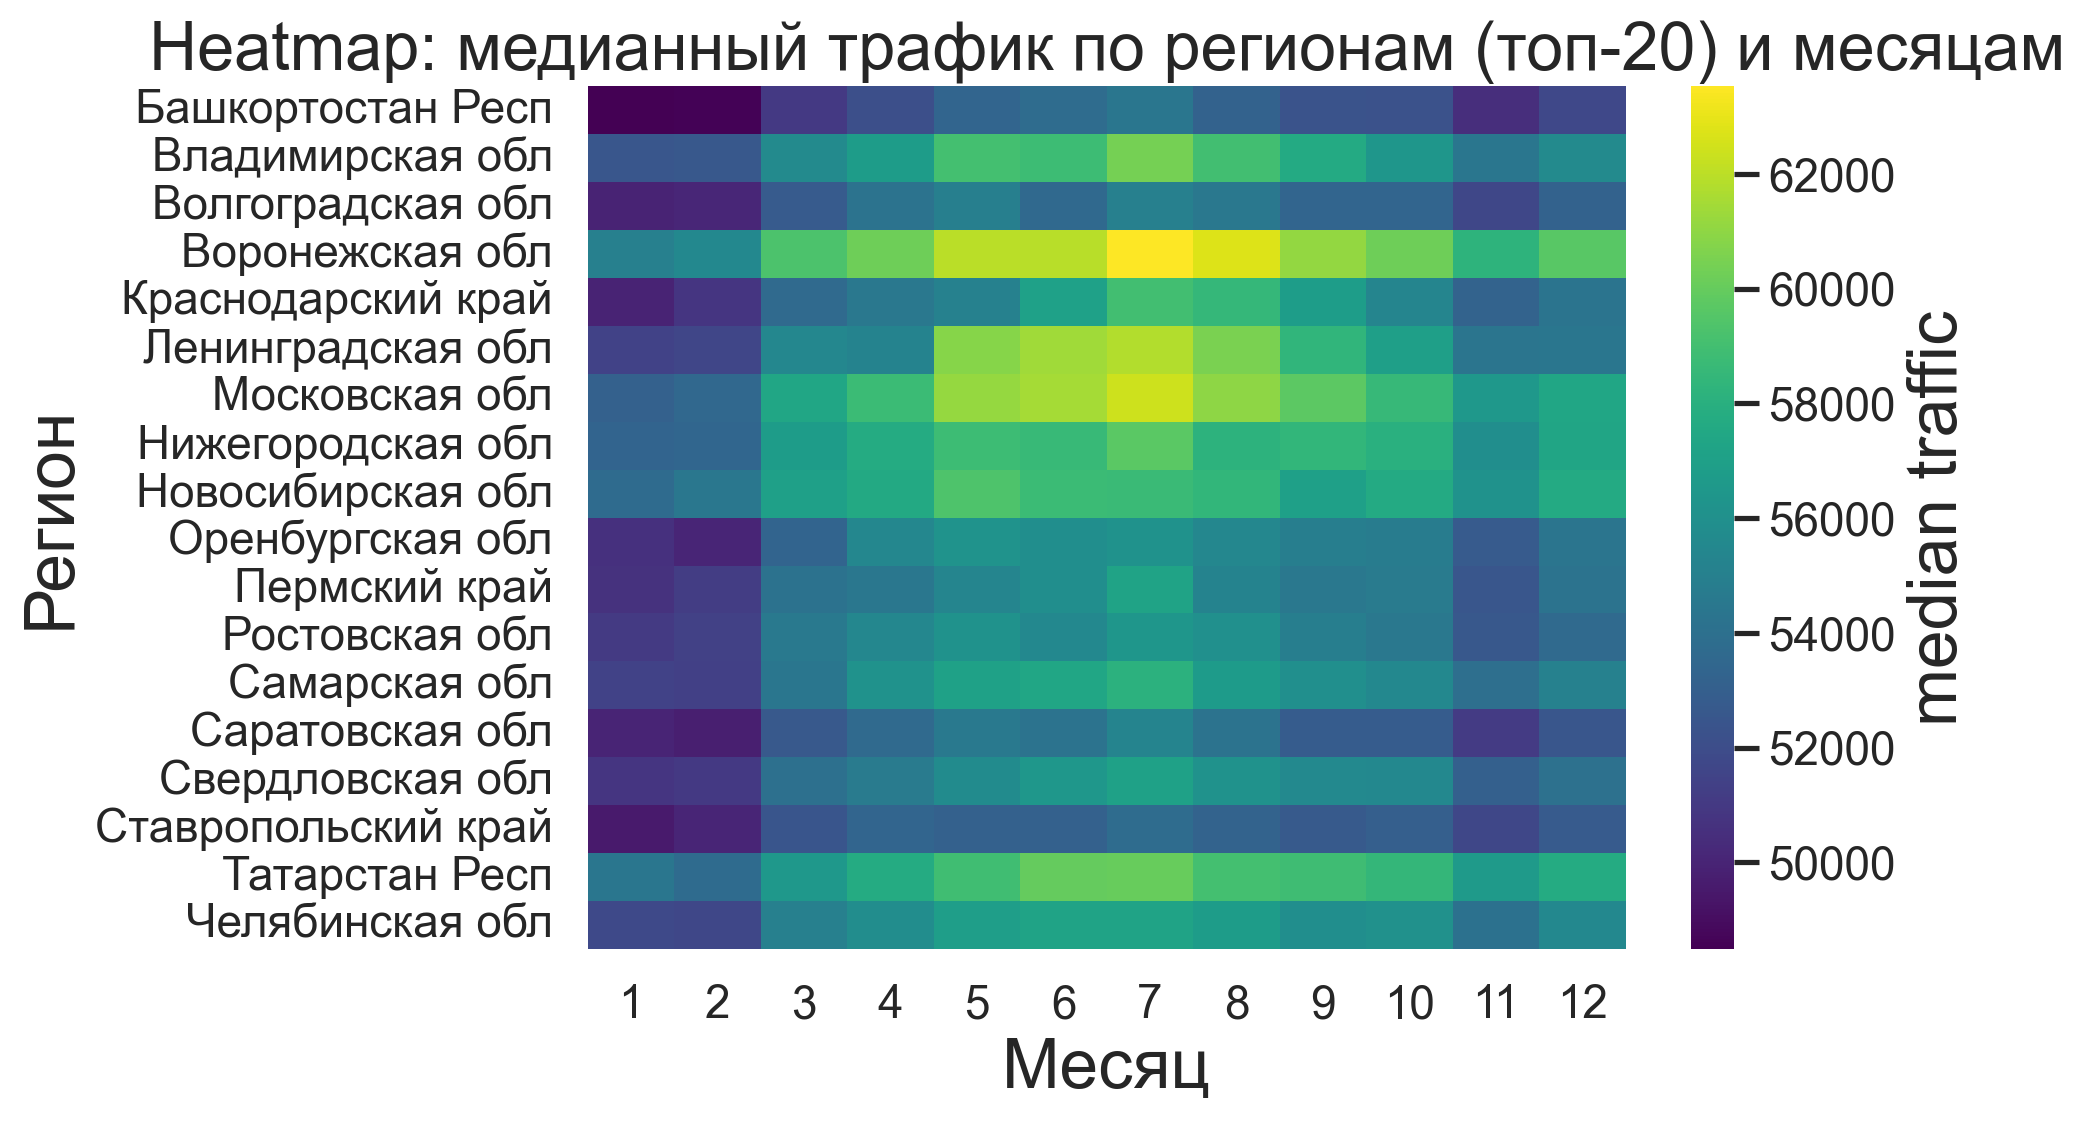

In [21]:
top_regions = df["region"].value_counts().head(20).index  # без москвы и питера
pivot = (
    df[
        (df["region"].isin(top_regions))
        & ~(df["region"].isin(["Москва г", "Санкт-Петербург г"]))
    ]
    .groupby(["region", "month"])["traffic"]
    .median()
    .unstack(fill_value=np.nan)
)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, cmap="viridis", cbar_kws={"label": "median traffic"})
plt.title("Heatmap: медианный трафик по регионам (топ-20) и месяцам")
plt.ylabel("Регион")
plt.xlabel("Месяц")
plt.tight_layout()
plt.show()

зимой в целом ходят в магазин меньше, только перед новым годом есть повышение 

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
result = kmeans.labels_
df['kmean_4'] = result

C:\Users\Daria\AppData\Local\Temp\ipykernel_10288\2694119462.py:11: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\Daria\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


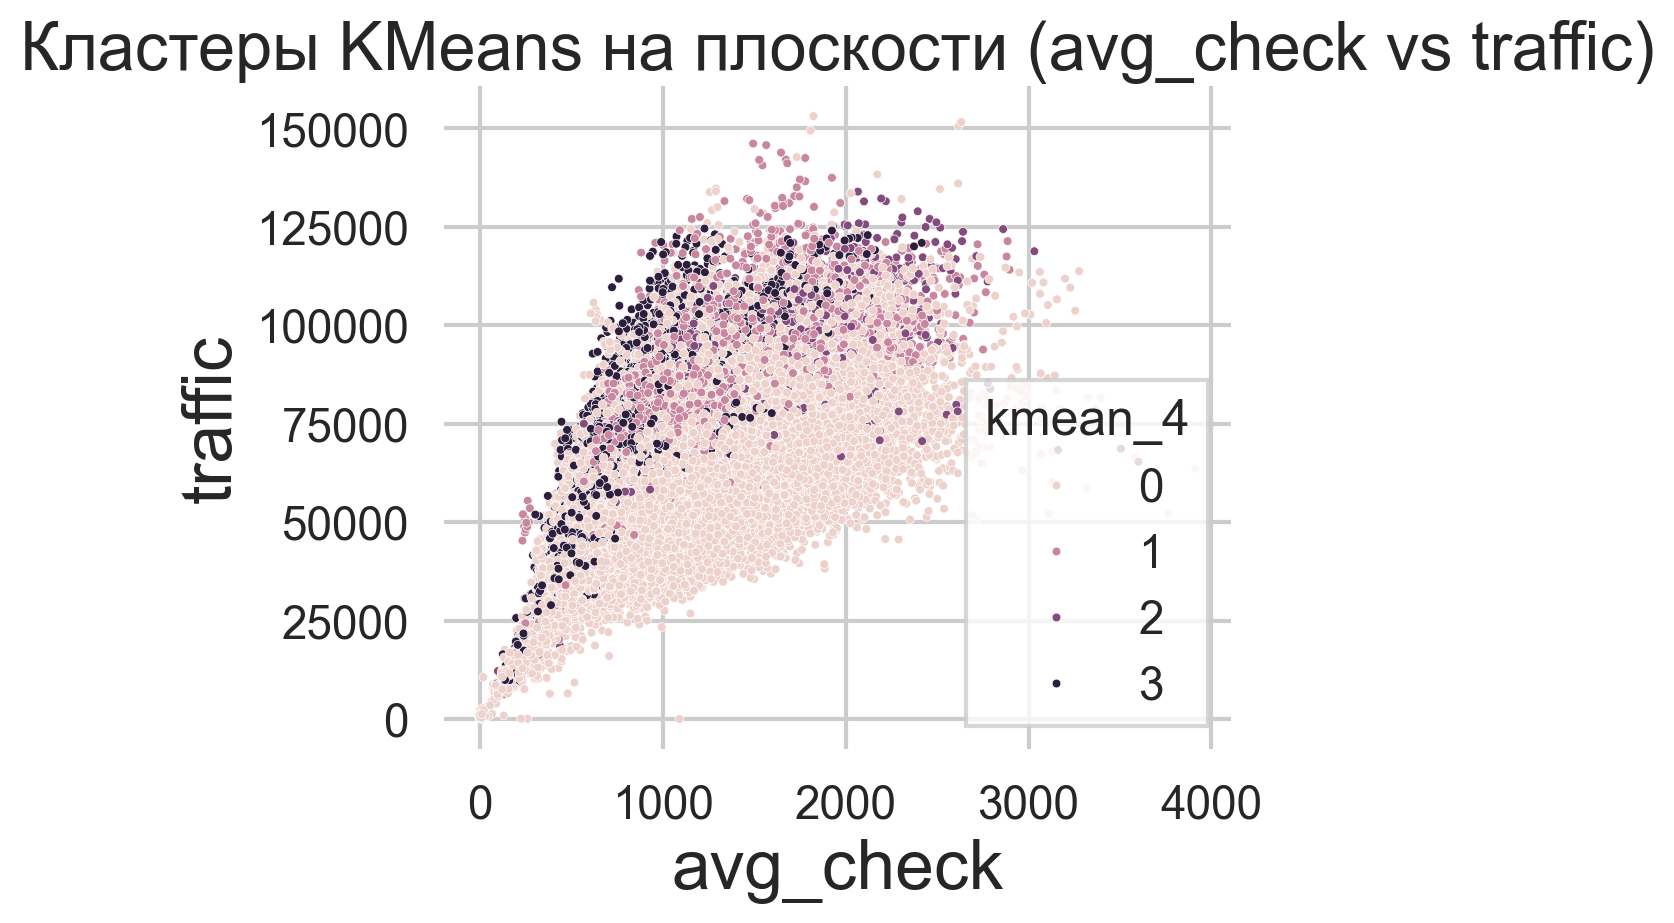

In [9]:

sns.scatterplot(
    data=df,
    x='avg_check',
    y='traffic',
    hue='kmean_4',
    # palette='tab10',
    s=10
)
plt.title('Кластеры KMeans на плоскости (avg_check vs traffic)')
plt.tight_layout()
